* Student name: Natalia Edelson
* Student pace: Flex
* Scheduled project review date/time: April 19, 2023
* Instructor name: Morgan Jones
* Blog: https://medium.com/@nataliagoncharov/analyzing-customer-sentiment-for-major-us-airlines-on-twitter-6656d23b1800

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Distribution-of-Data---Target" data-toc-modified-id="Distribution-of-Data---Target-0.0.1">Distribution of Data - Target</a></span></li></ul></li></ul></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-1">Word Cloud</a></span></li><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-2">Vectorization</a></span><ul class="toc-item"><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-2.1">TF-IDF</a></span></li><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-2.2">CountVectorizer</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3">Modeling</a></span><ul class="toc-item"><li><span><a href="#Interpreting-results-of-the-best-performing-model" data-toc-modified-id="Interpreting-results-of-the-best-performing-model-3.1">Interpreting results of the best performing model</a></span></li><li><span><a href="#Plotting-Negative-Tweets" data-toc-modified-id="Plotting-Negative-Tweets-3.2">Plotting Negative Tweets</a></span></li><li><span><a href="#Plotting-Positive-Tweets" data-toc-modified-id="Plotting-Positive-Tweets-3.3">Plotting Positive Tweets</a></span><ul class="toc-item"><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-3.3.1">Conclusion:</a></span></li></ul></li></ul></li></ul></div>

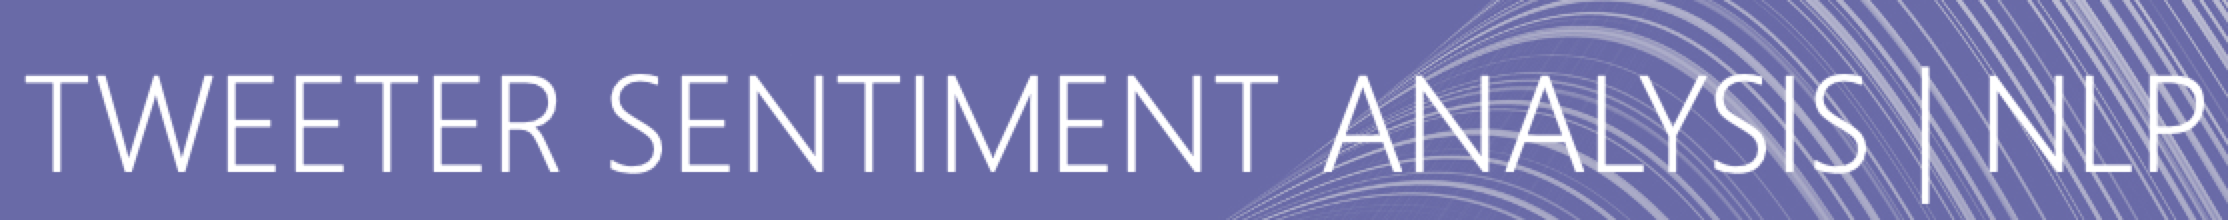

In [1]:
# Import Sklearn libraries to build models 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
# from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
# Import Libraries to perform computation and do visualization. 
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import string
import time
# Import nltk to check english lexicon.
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import wordnet, stopwords
from nltk import word_tokenize, FreqDist
from nltk import pos_tag # for Parts of Speech tagging
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Generate wordcloud for word distribution visualization.
from wordcloud import WordCloud 

# Generating random numbers.
import random 

from xgboost import XGBClassifier

# Transforms text to a fixed-length vector of integers.
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, 
                        module='gensim')
import gensim
import os

!pip install -q textdistance
import textdistance
#Efficient functions to search in strings.
import re as re 

# Import images for world cloud.
from PIL import Image, ImageDraw, ImageFont 


 
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

from tqdm.notebook import tqdm

from os import path
from os import environ

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# # Importing the dataset  
ta_df_full = pd.read_csv('Tweets.csv')

ta_df = ta_df_full[['airline_sentiment','text']]

ta_df.rename(columns={'airline_sentiment':'sentiment'},inplace=True)
ta_df.head()

<ipython-input-2-44819eb4c92b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ta_df.rename(columns={'airline_sentiment':'sentiment'},inplace=True)


sentiment                                               text
0   neutral                @VirginAmerica What @dhepburn said.
1  positive  @VirginAmerica plus you've added commercials t...
2   neutral  @VirginAmerica I didn't today... Must mean I n...
3  negative  @VirginAmerica it's really aggressive to blast...
4  negative  @VirginAmerica and it's a really big bad thing...

In [3]:
ta_df_full.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [4]:
# Looking into the type of data. Noting the data does not seem to have 
# any missing values.

ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14640 non-null  object
 1   text       14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [5]:
ta_df.shape

(14640, 2)

In [6]:
# Check unique values in the sentiment column
ta_df['sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [7]:
# Checking distribution
ta_df['sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: sentiment, dtype: int64

In [8]:
ta_df['sentiment'] = ta_df['sentiment'] \
          .replace(['negative', 'neutral', 'positive'], [0, 1, 2])

<ipython-input-8-287330abf2f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ta_df['sentiment'] = ta_df['sentiment'] \


In [9]:
# Balance the data; Smpling 2,363 tweets randomly

df_positive = ta_df[ta_df['sentiment']==2]
df_negative = ta_df[ta_df['sentiment']==0].sample(2363)
df_neutral = ta_df[ta_df['sentiment']==1].sample(2363)

In [10]:
# Merging back the three sentiments
ta_df = pd.concat([df_positive,df_negative,df_neutral])

In [11]:
# Checking the size of the data
ta_df.shape

(7089, 2)

In [12]:
# Checking the percentage of null values
ta_df.isna().mean()*100

sentiment    0.0
text         0.0
dtype: float64

In [13]:
ta_df['sentiment'].value_counts()

2    2363
0    2363
1    2363
Name: sentiment, dtype: int64

#### Distribution of Data - Target 

The value_counts method is used to count the number of occurrences of each unique value in the sentiment column, and the "normalize=True" argument is used to calculate the percentages instead of the counts.

[Text(0.5, 1.0, 'Count of Tweets per Sentiment')]

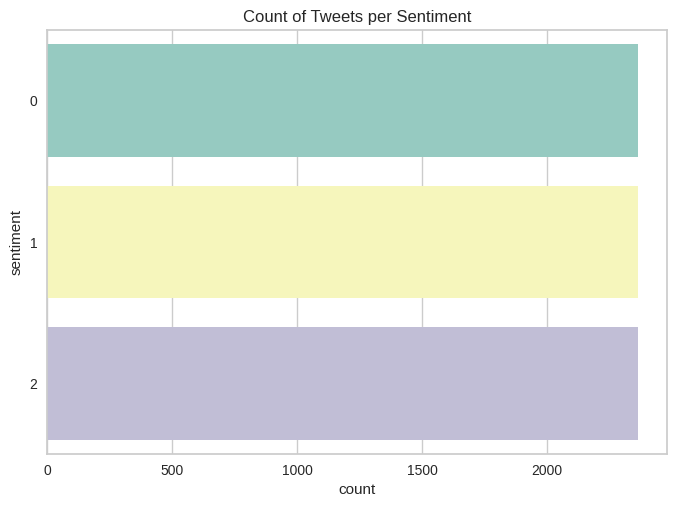

In [14]:
# Plot the count plot for the target labels.

# Setting p to plot of Emotion

p = sns.countplot(data = ta_df, y = 'sentiment', palette="Set3") 
p.set(xlabel = 'count') #Labling X
p.set(ylabel = 'sentiment') #Labling Y
p.set(title = "Count of Tweets per Sentiment")

In [15]:
# Displays the count of columns and rows in the DataFrame.

print('Count of columns in the data is:  ', len(ta_df.columns))
print('Count of rows in the data is:  ', len(ta_df))

Count of columns in the data is:   2
Count of rows in the data is:   7089


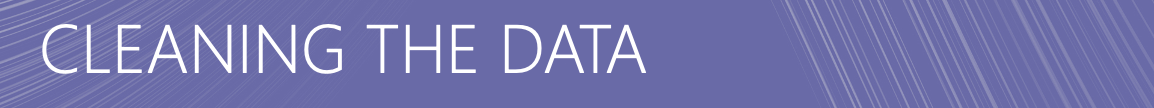

* Cleaning the data
* Checking and handling NaN values
* Drop duplicates

In [16]:
# Dropping NaN values

ta_df.dropna(inplace=True)

In [17]:
len(ta_df.duplicated(keep='last'))

7089

In [18]:
# Dropping duplicates
ta_df.drop_duplicates()
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7089 entries, 1 to 3378
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  7089 non-null   int64 
 1   text       7089 non-null   object
dtypes: int64(1), object(1)
memory usage: 166.1+ KB


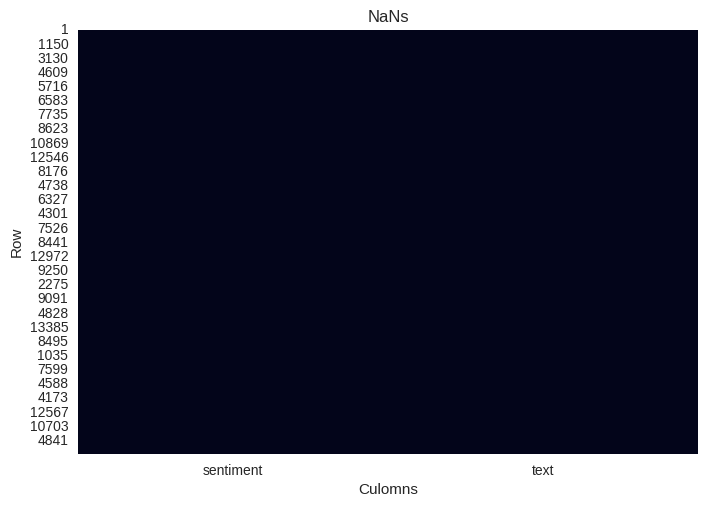

In [19]:
# Checking for Null values.  We use the heatmap code which 
# shows the contrast well.

sns.heatmap(ta_df.isnull(), cbar=False)
plt.title("NaNs")
plt.xlabel('Culomns')
plt.ylabel('Row')
plt.show()

Now that our data is clean and without duplicates, we can proceed to preprocess the tweets for our machine learning models.

In [20]:
# Creating an independent copy  
ta_df_copy = ta_df.copy()

Pre-process Text
We will use text processing to allow the data to be more digestible for model use later in this project. This is an integral step in Natural Language Processing (NLP).

The Preprocessing steps taken are:

Converting to lower case letters: Each text will be transferred to a lower case letter.

Removing stop words: Remove common words like "a", "an", "the", etc., which don't carry much meaning and can be safely removed without affecting the model's performance.

Removing Words with 2 letters: Words with length less than 2 are removed.

Replacing http with space: Links starting with "http" or "https" or "www" are replaced by " ".

Stemming to reduce words to their root form to remove any variations of the same word.

In [21]:
# Defining a preprocessing function for cleaning and preprocessing 
# text data.

tqdm.pandas() # Adding the progress bar
ps = PorterStemmer() # Defining stemming words wiht ps

# Removes URLs and non-alphanumeric 
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" 

# Replace 3 or more consecutive letters by 2 letter.
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

stop_words = set(stopwords.words("english")) # Creating a set of 
#English stopwords 


# Defining  the preprocessing function

def preprocess(text,apply_stem=True):
    
# Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub(sequencePattern, seqReplacePattern, text)
    
    tokens = [] 
    for token in text.split():
        if token not in stop_words:
        # Checking if the word is not a stopword  
            if apply_stem:
        # Stemming to the word using the PorterStemmer if True
                tokens.append(ps.stem(token))  
            else:
        # Adding the original word if stemming is not 
        # applied (for wordcloud)
                tokens.append(token) 
        # Joining and retuning the list of tokenized words 
        # into a one string
    return " ".join(tokens)

In [22]:
# Creating a new column apply a function to each row

ta_df['clean_tweet'] = (
    ta_df['text'].progress_apply(lambda x:preprocess(x,True))
)

  0%|          | 0/7089 [00:00<?, ?it/s]

In [23]:
ta_df['clean_tweet'].head()

1                          plu ad commerci experi tacki
6          ye nearli everi time fli vx ear worm go away
8                                                  well
9                            amaz arriv hour earli good
11    lt 3 pretti graphic much better minim iconographi
Name: clean_tweet, dtype: object

In [24]:
# Creating a new column apply a function to each row

ta_df['clean_tweet_wt_stem'] = (
    ta_df['text']
    .progress_apply(lambda x: preprocess(x, False))
)

  0%|          | 0/7089 [00:00<?, ?it/s]

In [25]:
# Checking that the change has taken place. 
ta_df.head(50)

sentiment                                               text  \
1            2  @VirginAmerica plus you've added commercials t...   
6            2  @VirginAmerica yes, nearly every time I fly VX...   
8            2    @virginamerica Well, I didn't…but NOW I DO! :-D   
9            2  @VirginAmerica it was amazing, and arrived an ...   
11           2  @VirginAmerica I &lt;3 pretty graphics. so muc...   
12           2  @VirginAmerica This is such a great deal! Alre...   
13           2  @VirginAmerica @virginmedia I'm flying your #f...   
14           2                             @VirginAmerica Thanks!   
16           2  @VirginAmerica So excited for my first cross c...   
18           2                    I ❤️ flying @VirginAmerica. ☺️👍   
19           2  @VirginAmerica you know what would be amazingl...   
21           2  @VirginAmerica I love this graphic. http://t.c...   
22           2  @VirginAmerica I love the hipster innovation. ...   
34           2  @VirginAmerica this is great news!  America co...   
36           2  @VirginAmerica Moodlighting is the only way to...   
37           2  @VirginAmerica @freddieawards Done and done! B...   
40           2  @VirginAmerica View of downtown Los Angeles, t...   
45           2  @VirginAmerica I'm #elevategold for a good rea...   
47           2          @VirginAmerica wow this just blew my mind   
51           2  @VirginAmerica @ladygaga @carrieunderwood Juli...   
56           2  @VirginAmerica you know it. Need it on my spot...   
57           2  @VirginAmerica @ladygaga @carrieunderwood  I'm...   
64           2  @VirginAmerica @ladygaga @carrieunderwood  lov...   
68           2  @VirginAmerica Congrats on winning the @Travel...   
74           2  @VirginAmerica not worried, it's been a great ...   
75           2  @VirginAmerica awesome. I flew yall Sat mornin...   
81           2  @VirginAmerica I've applied more then once to ...   
105          2  @VirginAmerica - amazing customer  service, ag...   
109          2  @VirginAmerica has getaway deals through May, ...   
111          2  @VirginAmerica has getaway deals through May, ...   
113          2                @VirginAmerica Have a great week 🌞✈   
114          2  @VirginAmerica come back to #PHL already. We n...   
116          2  @VirginAmerica is the best airline I have flow...   
117          2  @VirginAmerica and again! Another rep kicked b...   
118          2  @VirginAmerica your beautiful front-end design...   
119          2  @VirginAmerica Love the team running Gate E9 a...   
123          2  @VirginAmerica thanks to your outstanding NYC-...   
124          2  @VirginAmerica you have the absolute best team...   
127          2  @VirginAmerica completely awesome experience l...   
136          2  @virginamerica you ROCK for making it so I can...   
138          2                      @VirginAmerica always!!! Xoxo   
141          2  @VirginAmerica best customer service rep in th...   
144          2  @VirginAmerica you have amazing staff &amp; su...   
147          2  Always have it together!!! You're welcome! RT ...   
148          2  @virginamerica #flight home to #dc #sunset #gl...   
152          2  @VirginAmerica thank you for checking in. tick...   
176          2            @VirginAmerica Thank you for the follow   
183          2  😎 RT @VirginAmerica: You’ve met your match. Go...   
184          2     @VirginAmerica Only way to fly! #Elevate #Gold   
189          2  @VirginAmerica you will match my #AmericanAirl...   

                                           clean_tweet  \
1                         plu ad commerci experi tacki   
6         ye nearli everi time fli vx ear worm go away   
8                                                 well   
9                           amaz arriv hour earli good   
11   lt 3 pretti graphic much better minim iconographi   
12   great deal alreadi think 2nd trip australia am...   
13   virginmedia fli fabul seduct sky u take stress...   
14                   

In [26]:
ta_df['clean_tweet_wt_stem']

1                  plus added commercials experience tacky
6            yes nearly every time fly vx ear worm go away
8                                                     well
9                          amazing arrived hour early good
11       lt 3 pretty graphics much better minimal icono...
                               ...                        
11264    noticed believe saw confirmation flight bought...
1505                   tell jet airways award availability
8194                                      look capture uvf
12486    already reply sorry believe fair journalist wr...
3378                                       dm conf receive
Name: clean_tweet_wt_stem, Length: 7089, dtype: object

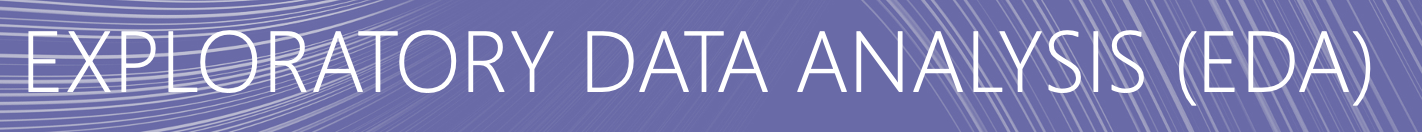

##  Word Cloud

We are creating a wordcloud with masking which allows us to visualize words in a specific shape of thumbs up and down.

In [27]:
# Storing clean tweets
tweets = ta_df['clean_tweet_wt_stem']

With these Series objects containing the preprocessed text, you can perform further analysis or visualization on the negative and positive tweets separately. We will be able to create separate word clouds for each sentiment group or calculate the most frequent words in each group.

In [28]:
# Storing the rows with a sentiment value of 0,
# which represents negative sentiment. 
tweet_negative = ta_df[ta_df['sentiment']==0]

# Storing the rows with a sentiment value of 1, 
# which represents positive sentiment. 
tweet_positive = ta_df[ta_df['sentiment']==2]

In [29]:
# Storing the preprocessed text of the tweets with negative sentiment 
tweet_negative = tweet_negative['clean_tweet_wt_stem']
# Storing the preprocessed text of the tweets with positive sentiment 
tweet_positive = tweet_positive['clean_tweet_wt_stem']

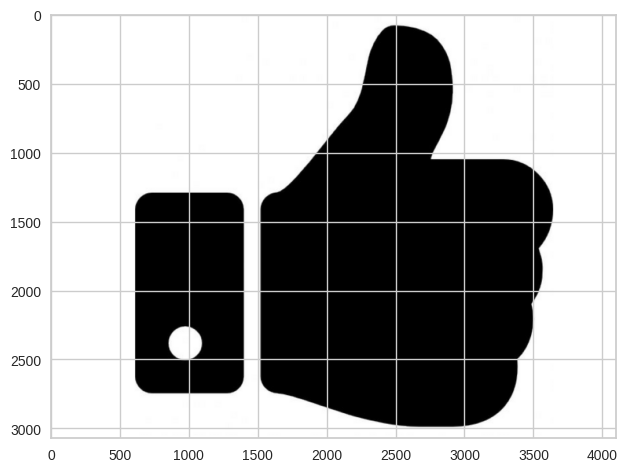

In [30]:
# Resizing  it to a 20x20 size using the Image.ANTIALIAS filter
img = Image.open('upvote.png')
img.resize((20, 20), Image.ANTIALIAS)
plt.imshow(img) # show output

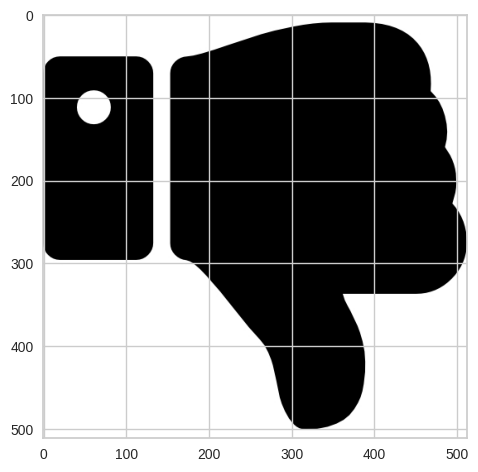

In [31]:
# Resizing  it to a 20x20 size using the Image.ANTIALIAS filter
mask_d = Image.open('final.png')
mask_d.resize((20, 20), Image.ANTIALIAS)
plt.imshow(mask_d) # show output

In [32]:
# Gerenrating wordcloud
def wc(data, mask, fname):
   
    plt.figure(figsize=(50,50))  # Set the size of the plot
    
    wc = WordCloud(width=300, height=200, background_color='white',
                   max_words=50, max_font_size=300, colormap='rainbow',
                   mask=mask)
    # Create a new WordCloud object with the specified parameters
    
    wc.generate(' '.join(data))  # Generate the WordCloud from the text data
    
    plt.imshow(wc)  # Display the WordCloud on the plot
    plt.grid(visible=False)  # Remove the grid from the plot
    plt.savefig(f'{fname}.png', dpi=200) # Save the  image as a PNG file
    # plt.axis('off') # Optionally, remove the axes from the plot


In [33]:
# Open image
mask_pos = np.array(Image.open('upvote.png'))

In [34]:
# Open image
mask_neg = np.array(Image.open('final.png'))
#wc(tweet_negative, mask_neg, 'negative')

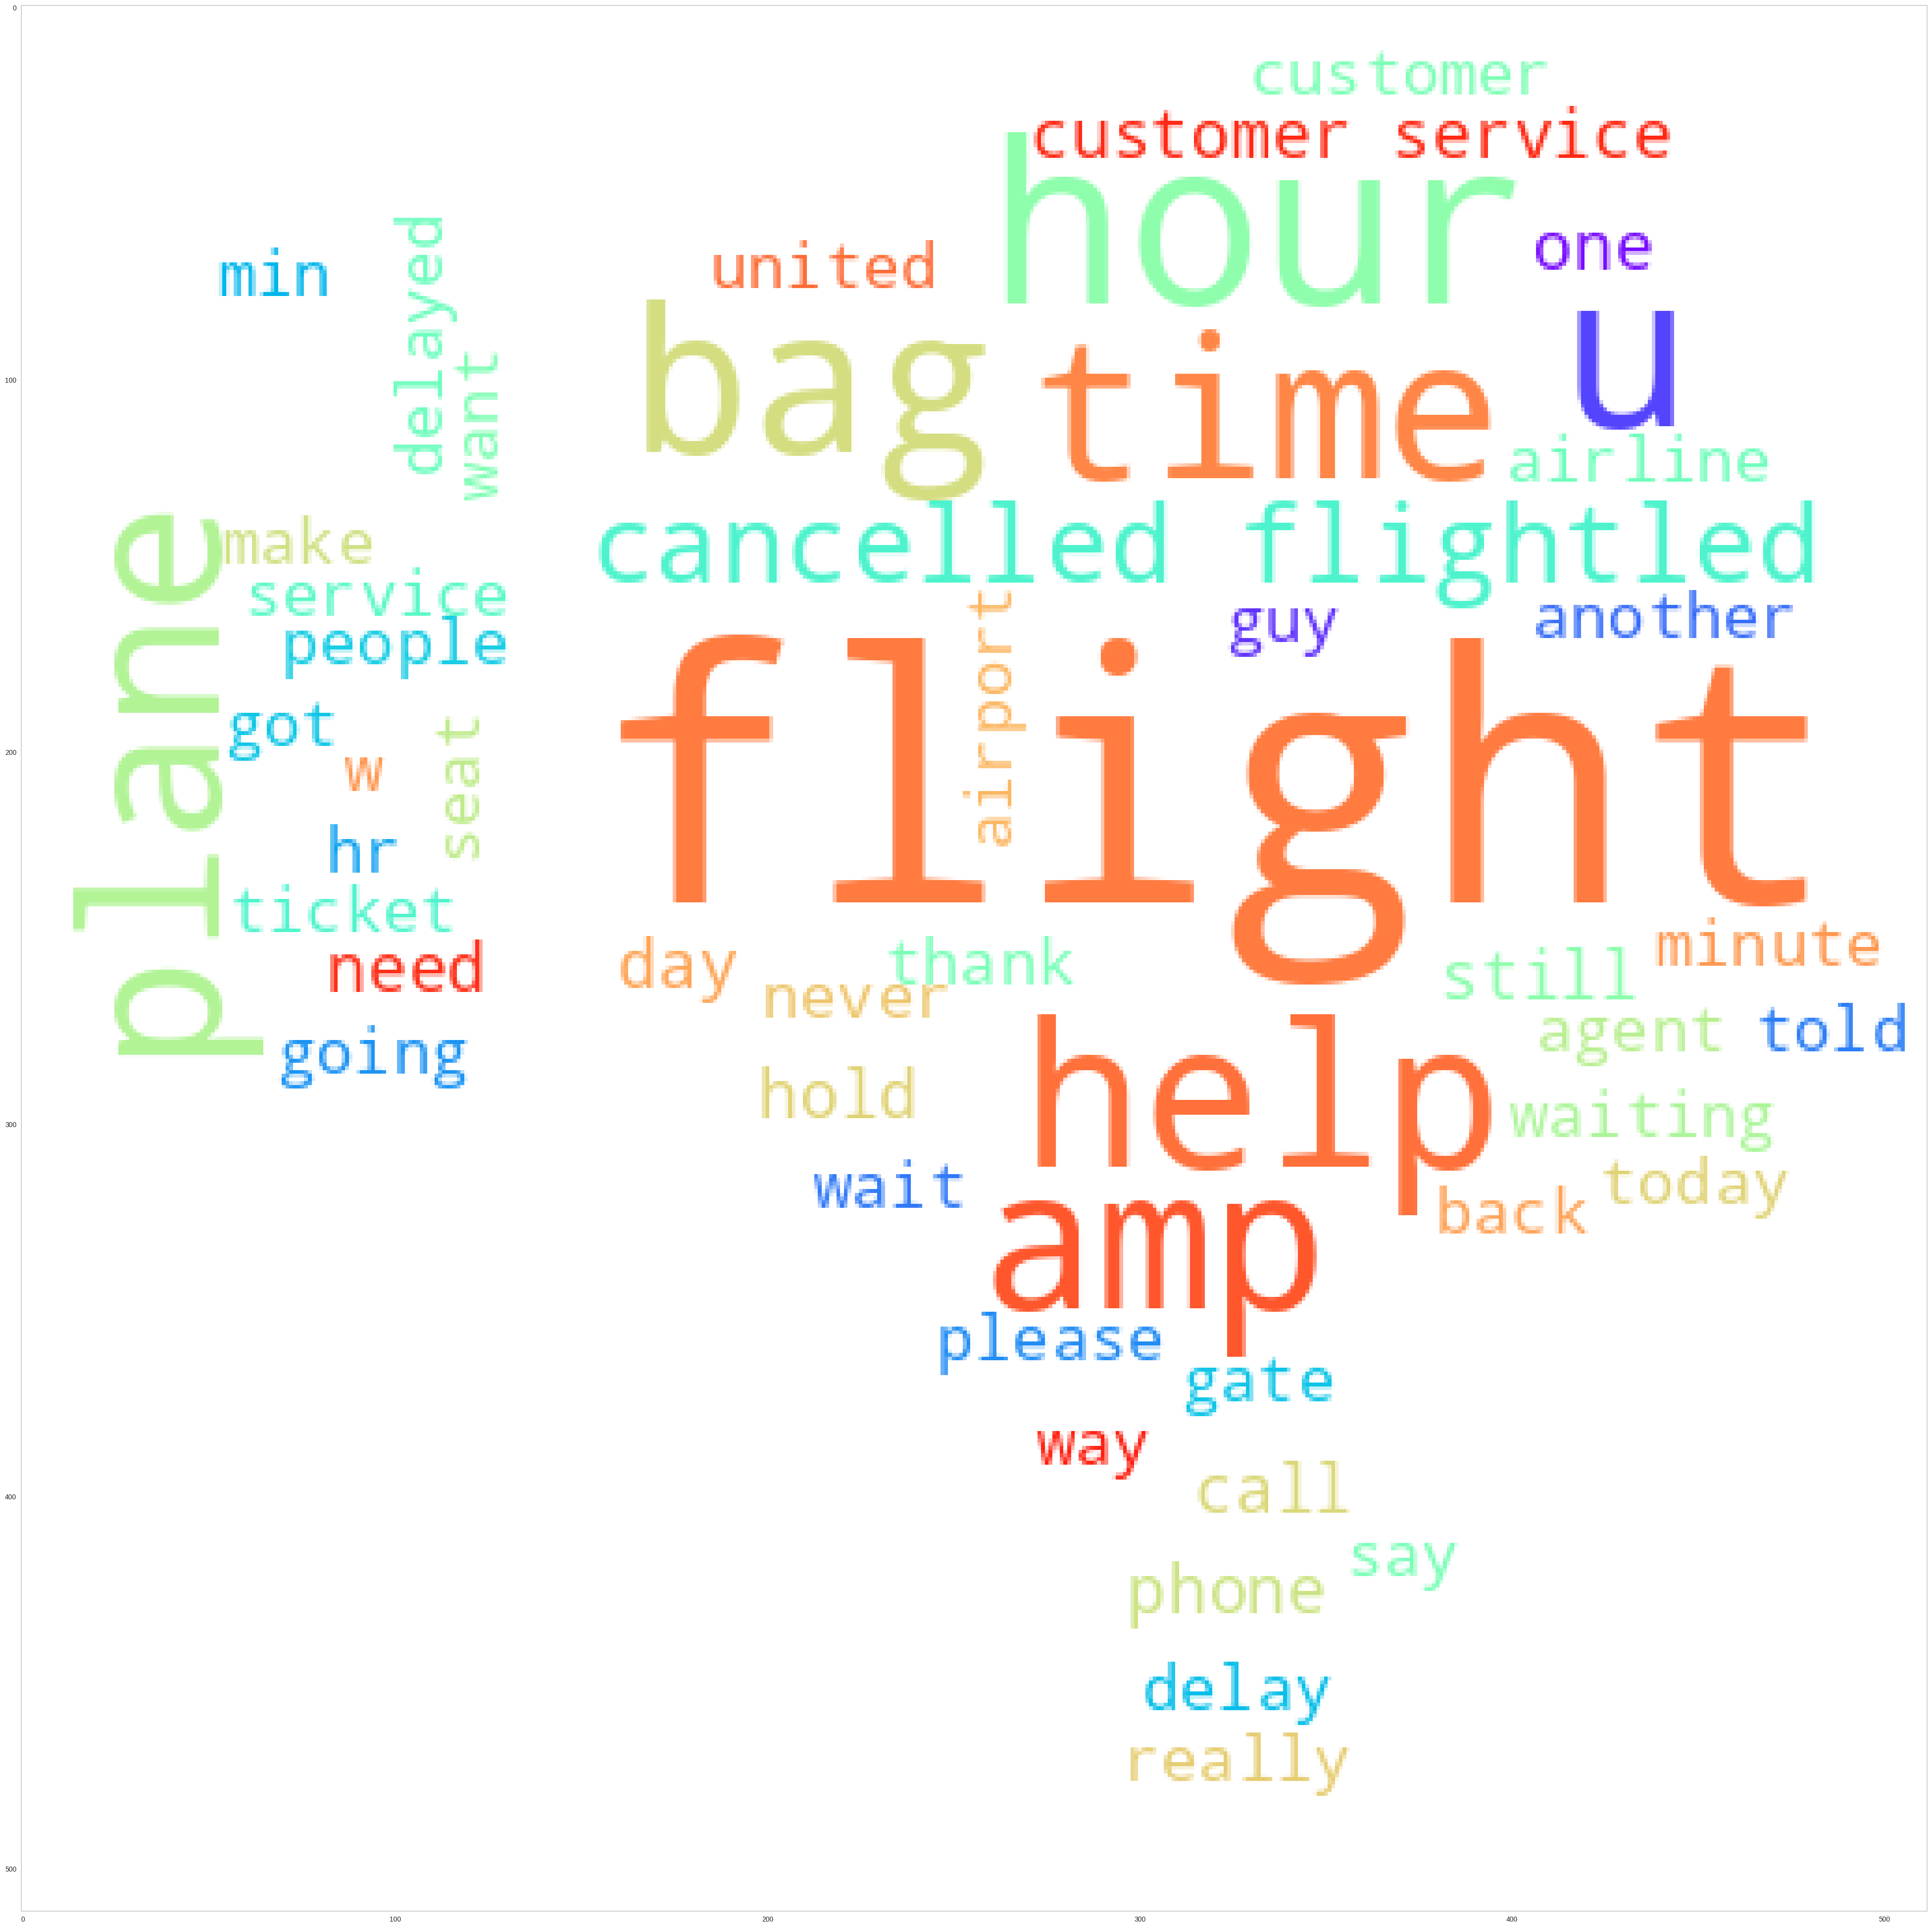

In [35]:
# Run function for wordcloud
wc(tweet_negative, mask_neg,'negative')

Based on the top keywords generated from the positive topic, it seems that the topic is related to positive feedback or comments regarding flights. The top keywords "flight", "thank", "seat", "please", and "fleet" suggest that customers are expressing gratitude and appreciation for their flights or for the service provided by airline staff, including comfortable seating. This topic could represent a cluster of tweets that express positive sentiment or satisfaction with airline travel.

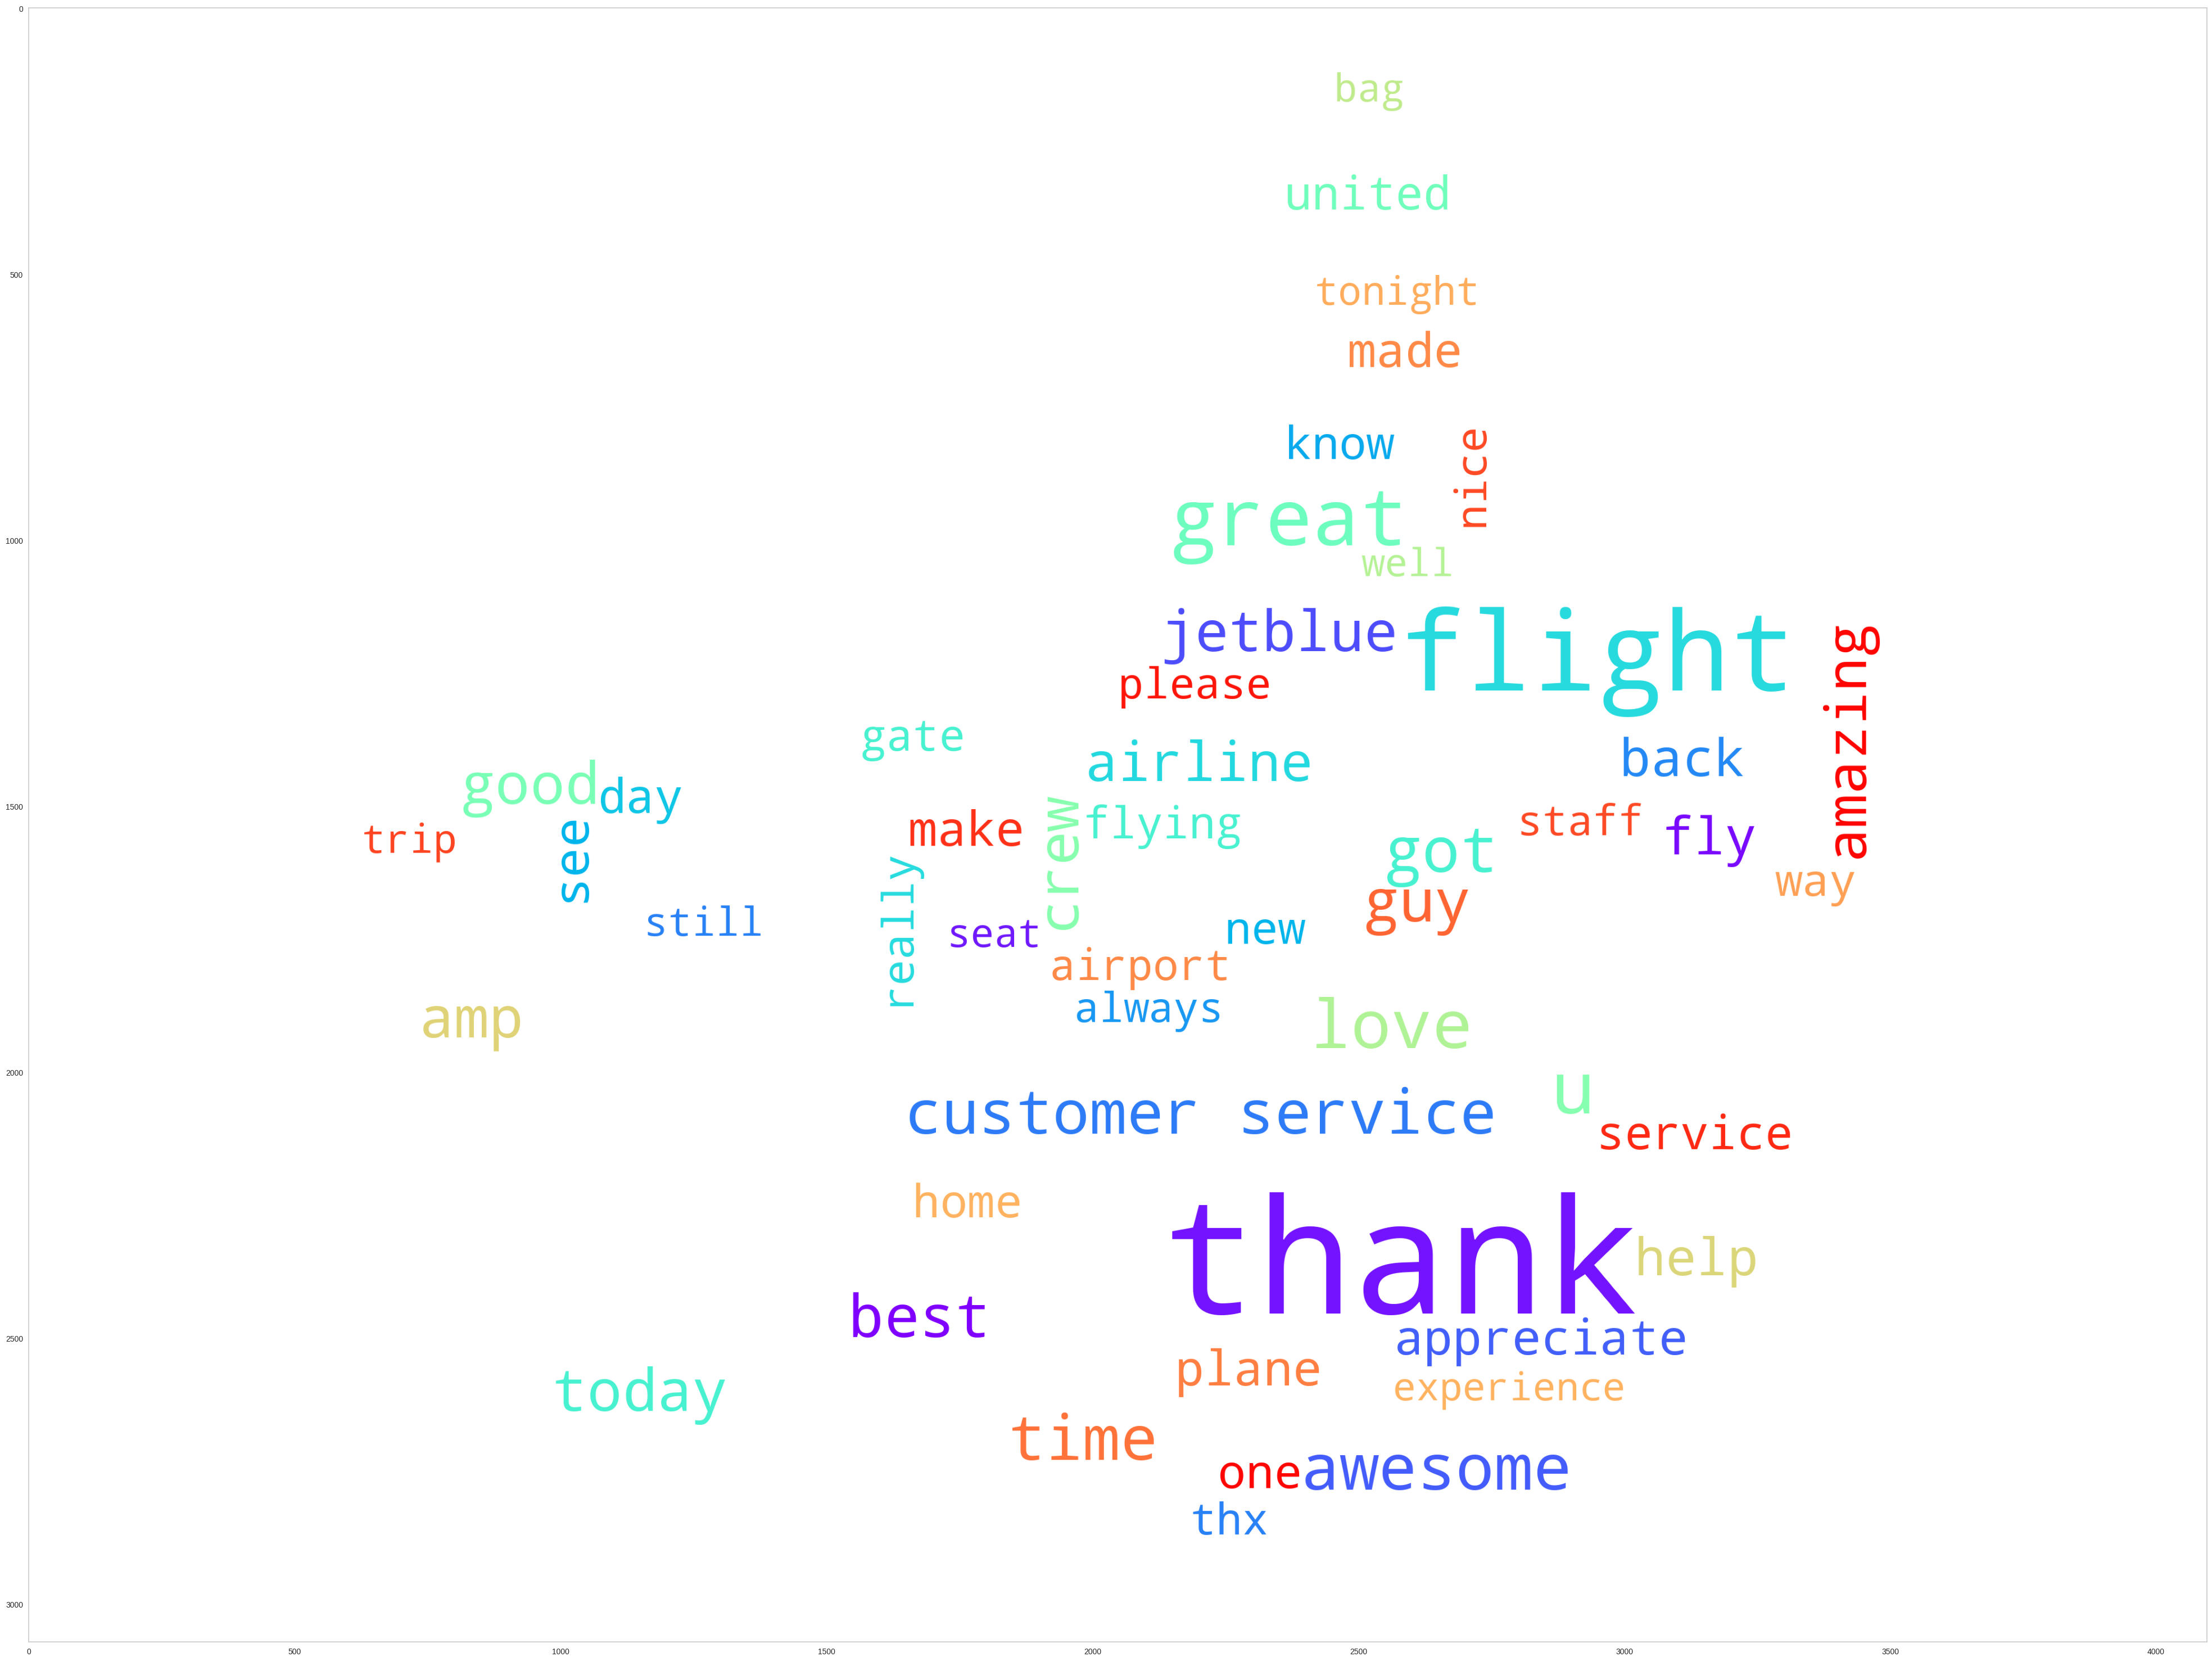

In [36]:
# Run function for wordcloud
wc(tweet_positive, mask_pos,'positive')

Based on the top keywords generated from the negative topic, it seems that the topic is related to complaints or negative feedback regarding flight cancellations, customer service, and delays. The top keywords "flight", "canceled", "help", "waiting", "customer service", "agent", and "delay" suggest that customers are expressing frustration and dissatisfaction with airline travel due to cancellations, long wait times, poor customer service, and delays caused by airline staff.

In [37]:
pos_df = (
    ta_df['clean_tweet_wt_stem']
    .loc[ta_df['sentiment'] == 2]
    .progress_apply(lambda line: line.split())
)

  0%|          | 0/2363 [00:00<?, ?it/s]

In [38]:
neg_df = ta_df['clean_tweet_wt_stem'].loc[ta_df['sentiment'] == 0]\
    .progress_apply(lambda line: line.split())

  0%|          | 0/2363 [00:00<?, ?it/s]

In [39]:
tokens = [] # Instantiating total token list
tokens_pos = [] #Instantiating positive token list
tokens_neg = [] #Instantiating negative token list


for row in pos_df:
    tokens.extend(row) #Populating token list from dataframe
for row in pos_df:
    tokens_pos.extend(row) #Populating token list from dataframe
for row in neg_df:
    tokens_neg.extend(row) #Populating token list from dataframe

print(f'Total Corpus Tokens: {len(tokens)}') 
# Print total number of tokens
print(f'Number of Positive Tokens: {len(tokens_pos)}') 
# Print number of positive tokens
print(f'Number of Negative Tokens: {len(tokens_neg)}') 
# Print number of negative tokens

Total Corpus Tokens: 17779
Number of Positive Tokens: 17779
Number of Negative Tokens: 24246


The function creates two bar plots. The first plot shows the top 10 most frequent positive n-grams, and the second plot shows the top 10 most frequent negative n-grams.

This will create and display the bar plots for unigrams (1-grams) of positive and negative tokens. You can change the input integer to display n-grams of different sizes: bigrams (2-grams) or trigrams (3-grams).

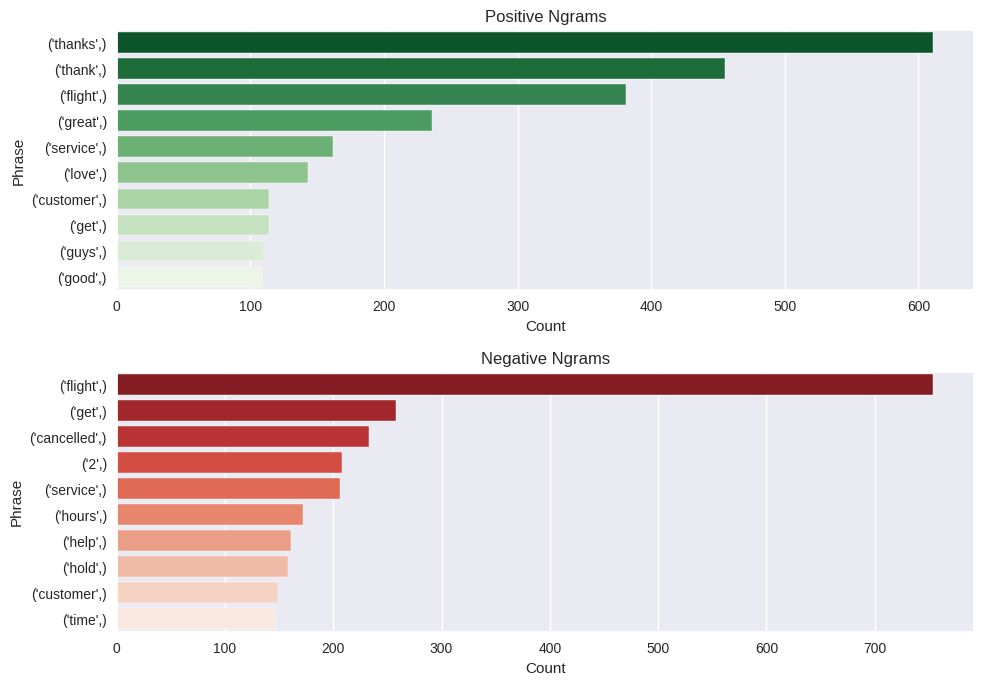

In [40]:
# Defining function

def make_ngram(i, tokens_pos = tokens_pos, tokens_neg = tokens_neg): 
     #Setting up positive ngram
    n_gram_pos = (pd.Series(nltk.ngrams(tokens_pos, i)).value_counts())[:10]
    #Setting up negative ngram
    n_gram_neg = (pd.Series(nltk.ngrams(tokens_neg, i)).value_counts())[:10] 
    
    n_gram_df_pos = pd.DataFrame(n_gram_pos) #Creating positive ngram dataframe
    n_gram_df_neg = pd.DataFrame(n_gram_neg) #Creating negative ngram dataframe
    
    n_gram_df_pos = n_gram_df_pos.reset_index() #Resetting index
    n_gram_df_neg = n_gram_df_neg.reset_index() #Resetting index
    
    #Renaming positive plot
    n_gram_df_pos = n_gram_df_pos.rename(columns = {'index': 'Phrase',
                                                    0: 'Count'}) 
    #Renaming negative plot
    n_gram_df_neg = n_gram_df_neg.rename(columns = {'index': 'Phrase',
                                                    0: 'Count'}) 
    
    with sns.axes_style('darkgrid'): #Setting seaborn to darkgrid style
        
        fig = plt.figure(figsize = (10, 10)) #Setting figsize
        ax1 = fig.add_subplot(311) #Stacking first figure
        ax2 = fig.add_subplot(312) #Stacking second figure
        
        sns.barplot(ax = ax1, x = 'Count', y = 'Phrase', data = n_gram_df_pos,
                    # Assigning barplot to positive ngrams
                    palette = 'Greens_r').set(title = 'Positive Ngrams') 
        sns.barplot(ax = ax2, x = 'Count', y = 'Phrase', data = n_gram_df_neg, 
                    # Assigning barplot to negative ngrams
                   palette = 'Reds_r').set(title = 'Negative Ngrams') 
        
        
    plt.tight_layout() #Make plot layouts tight

make_ngram(1) #Plot 1 word ngrams

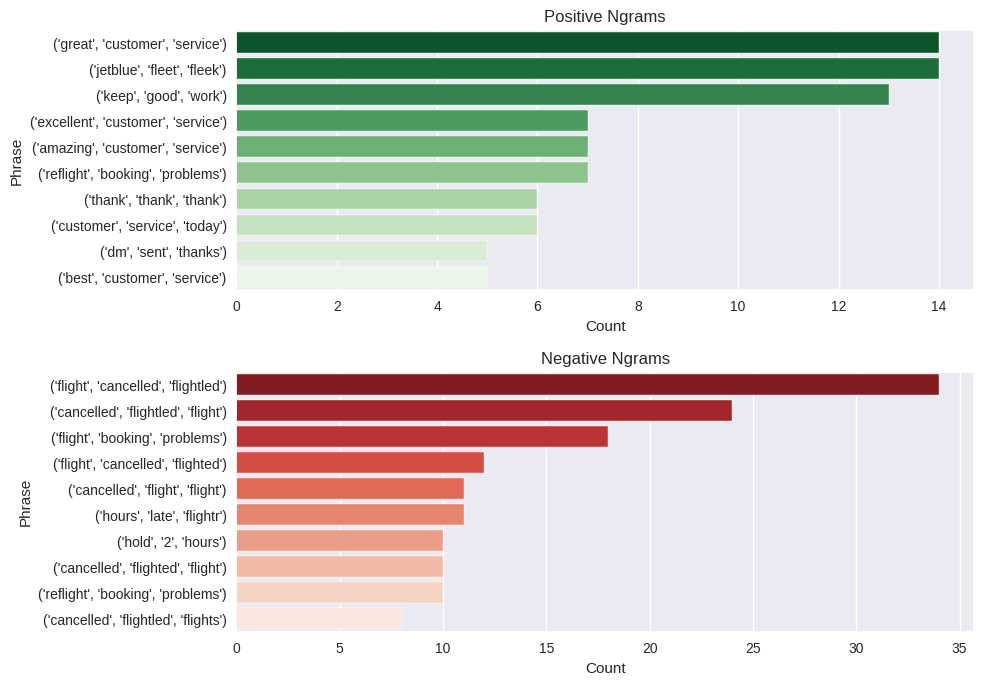

In [41]:
make_ngram(3) #Plot 2 word ngrams

*Positive tweets 3-ngrams

"happy mother day" - This 3-ngram likely indicates that people are tweeting positive messages about Mother's Day, expressing happiness and joy on this occasion.

The ngram "get 100 followers" suggests that someone may be offering advice or tips on how to gain more followers.

*Negative tweets 3-ngrams

The phrase "wish we could" implies a sense of regret or disappointment about not being able to go.

"hope feel better" sending to someone who may be feeling unwell or going through a tough time.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


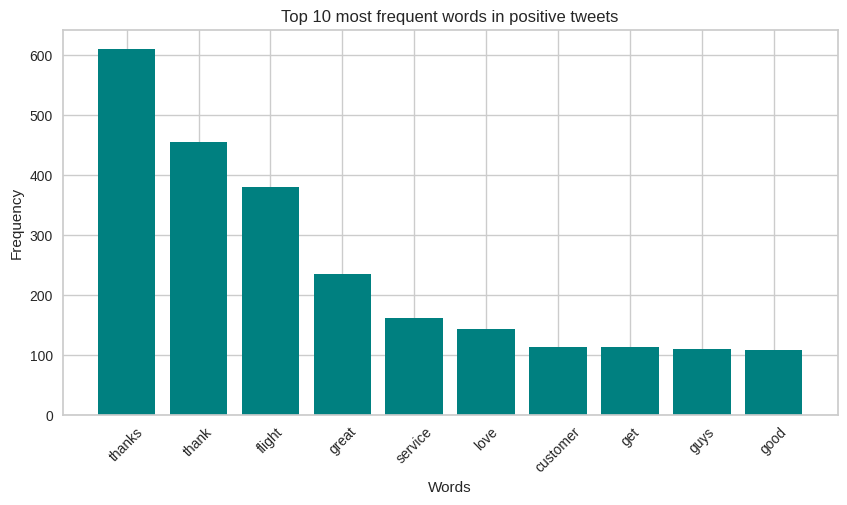

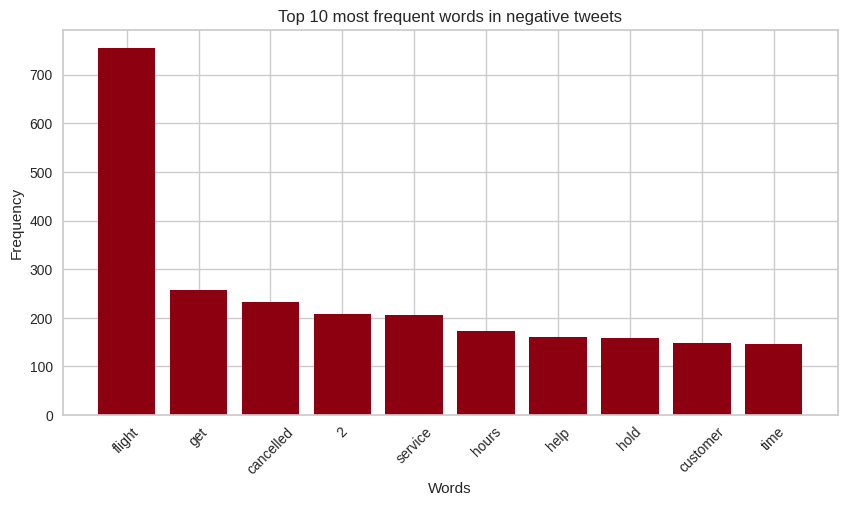

In [42]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import numpy as np
nltk.download('punkt')

positive_color = '#008080' # dark green
negative_color = '#8C000F' # dark red


def plot_word_frequency(positive_tweets, negative_tweets, num_words):
    ## Join the positive tokens back into a string
    positive_tweet_string = ' '.join(positive_tweets)
    # Tokenize the positive tweets
    positive_tokens = word_tokenize(positive_tweet_string)

    # Join the negative tokens back into a string
    negative_tweet_string = ' '.join(negative_tweets)
    # Tokenize the negative tweets
    negative_tokens = word_tokenize(negative_tweet_string)
    
    
    # Calculate the frequency distribution of the positive tokens
    positive_fdist = FreqDist(positive_tokens)
    # Calculate the frequency distribution of the negative tokens
    negative_fdist = FreqDist(negative_tokens)

    # Get the `num_words` most common words and their frequency for 
    # each category
    positive_top_words = positive_fdist.most_common(num_words)
    positive_words, positive_frequencies = zip(*positive_top_words)

    negative_top_words = negative_fdist.most_common(num_words)
    negative_words, negative_frequencies = zip(*negative_top_words)

    # Set colors for the bars
    colors = [positive_color, negative_color]

    # Create a bar chart of the word frequencies for positive tweets
    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(np.arange(num_words), positive_frequencies, color=colors[0])

    # Add titles and labels to the chart
    ax.set_title(f"Top {num_words} most frequent words in positive tweets")
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency")

    # Set the x-axis tick labels to the most common words
    ax.set_xticks(np.arange(num_words))
    ax.set_xticklabels(positive_words)

    # Rotate the x-axis labels to make them more readable
    plt.xticks(rotation=45)

    # Display the chart
    plt.show()

    # Create a bar chart of the word frequencies for negative tweets
    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(np.arange(num_words), negative_frequencies, color=colors[1])

    # Add titles and labels to the chart
    ax.set_title(f"Top {num_words} most frequent words in negative tweets")
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency")

    # Set the x-axis tick labels to the most common words
    ax.set_xticks(np.arange(num_words))
    ax.set_xticklabels(negative_words)

    # Rotate the x-axis labels to make them more readable
    plt.xticks(rotation=45)

    # Display the chart
    plt.show()

# Example usage
positive_tweets = tokens_pos
negative_tweets = tokens_neg
plot_word_frequency(positive_tweets, negative_tweets, 10)


In [43]:
df_neg = ta_df_full[['airline','negativereason']]

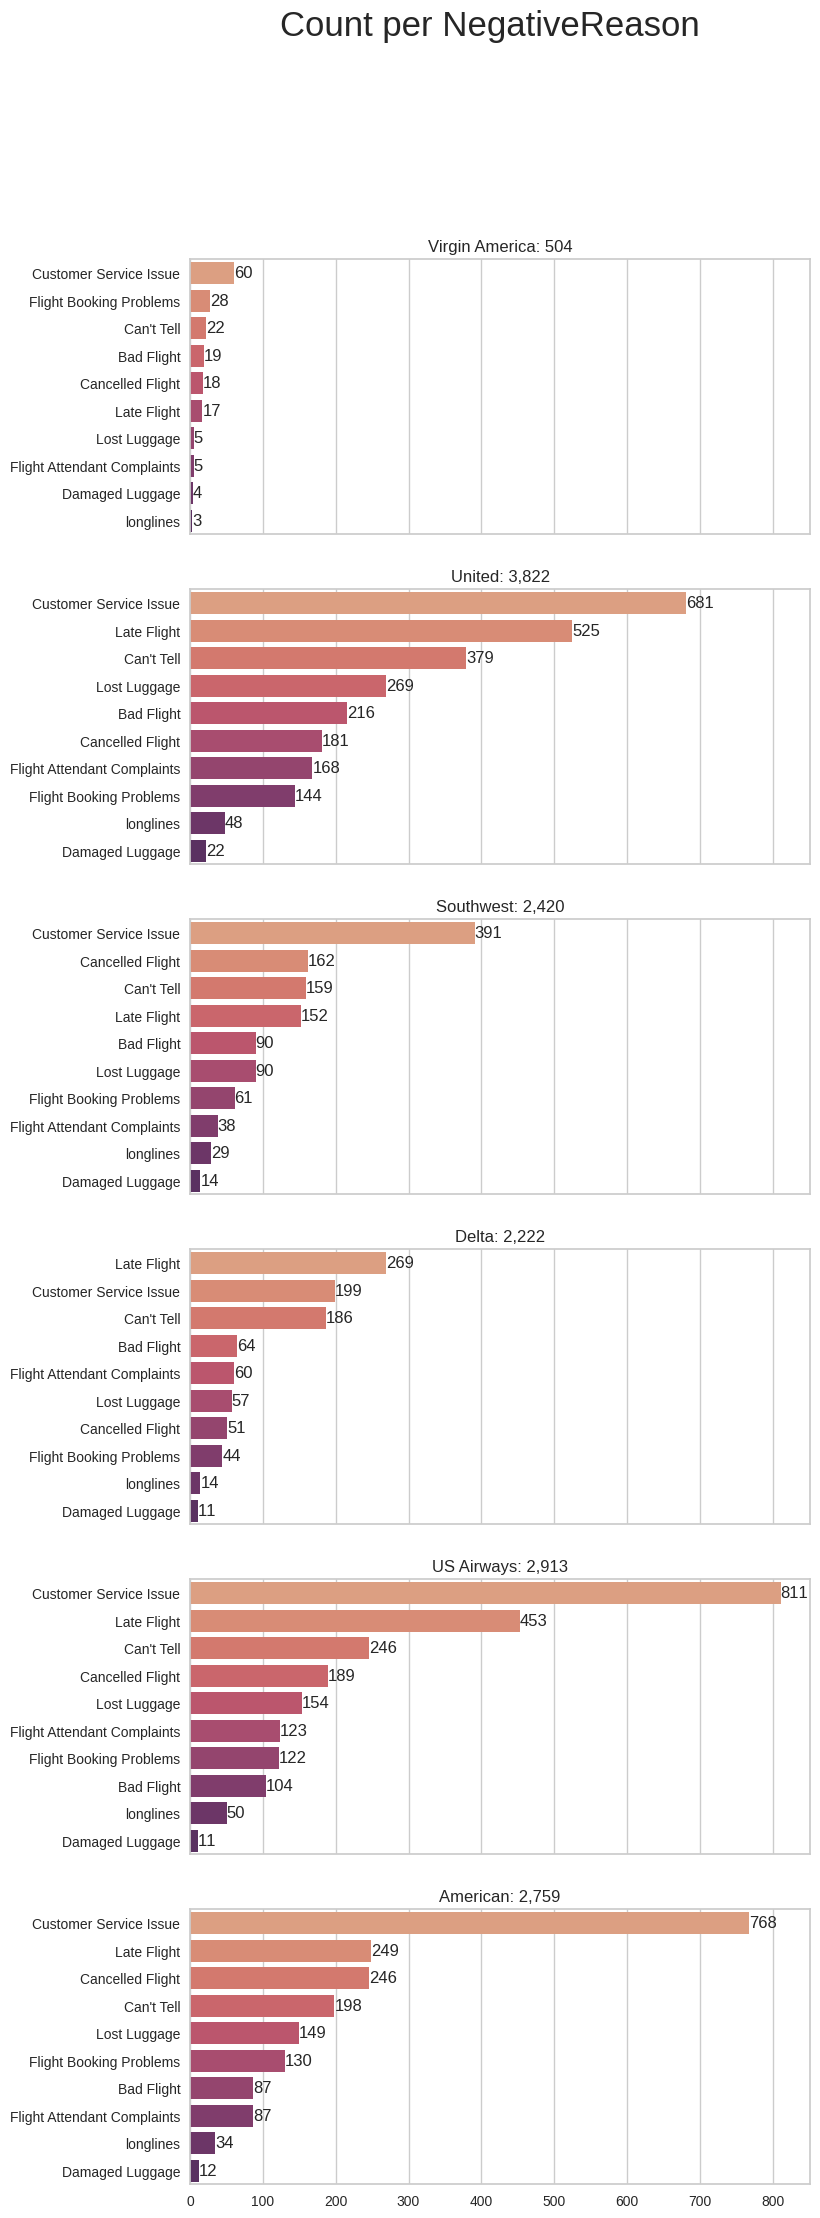

In [44]:
# Create a figure with 6 subplots for each airline and set the size and sharing of the x-axis
fig, axes = plt.subplots(6, 1, figsize=(8, 25), sharex=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Get the unique airline names from the negative dataframe
names = df_neg['airline'].unique()

# Iterate over each airline name and its corresponding subplot
for name, n in zip(names, axes):
    
    # Create a countplot for the negative reasons for the current airline, 
    # with a specific color palette and order of values
    ax = sns.countplot(data=df_neg[df_neg.airline==name], y='negativereason',
                       palette='flare',
                       order=df_neg[df_neg.airline==name].negativereason. \
                       value_counts().index, ax=n)
    
    # Add labels to the bars with their respective counts
    ax.bar_label(ax.containers[0])
    
    # Set the title of the subplot to include the airline name and the 
    # total count of negative reviews for that airline
    ax.set_title(f"{name}: {format(len(df_neg[df_neg.airline==name]),',')}")
    
    # Remove the x-label to prevent overlapping with the shared x-axis
    ax.set_xlabel('')
    
    # Set the y-label to indicate the negative reasons
    ax.set_ylabel('')
    
# Add a title to the entire figure
plt.suptitle("Count per NegativeReason", fontsize=25)

# Show the plot
plt.show()


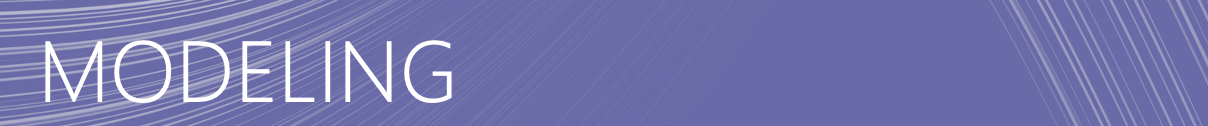

# Preparing for Modeling  

To prepare for modeling, we'll partition the data into train and test sets. 
Next, we'll define three vectorization methods and create a function that allows 
multiple models to iterate through each vectorization method. 
Finally, we'll gather the results and determine which combination of method and model worked best.

In [46]:
# Filter out tweets with no content (i.e., no words) after cleaning.
ta_df = ta_df[ta_df['clean_tweet'].apply(lambda x: len(x.split())!=0)]

In [47]:
# List of unique sentiment values

list(set(ta_df['sentiment']))

[0, 1, 2]

In [48]:
# Count values 
ta_df['sentiment'].value_counts()

2    2360
0    2359
1    2358
Name: sentiment, dtype: int64

In [49]:
ta_df['sentiment'].value_counts()

2    2360
0    2359
1    2358
Name: sentiment, dtype: int64

In [50]:
X = ta_df['clean_tweet'] 

y = ta_df['sentiment'] 

In [51]:
# Spliting your dataset into training and testing sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 43)

## Vectorization

We will utilize three different vectorization approaches: TF-IDF, Vector Count, and Word2Vec. We will examine which vector approach has worked best among the machine learning models. 

### TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word to a document in a corpus. It assigns more weight to words that are less frequent in the entire corpus and less weight to words that are more common. The calculation involves both: Term Frequency (TF) and Inverse Document Frequency (IDF).

IDF: IDF = log( (count of documents) / (count of documents containing the word) )

TF: TF = (count of the frequency of a word in a document) / (count of words in a document) https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/

In [52]:
# Initializing TFIDF 
vectoriser_tfidf = TfidfVectorizer()

In [53]:
# Fit the data 
vectoriser_tfidf.fit(X_train)

print('Number of feature words:', 
      len(vectoriser_tfidf.get_feature_names_out()))

Number of feature words: 6295


In [54]:
# Converting the tweets in train and test data into TFIDF features  
X_train_tfidf = vectoriser_tfidf.transform(X_train)
X_test_tfidf  = vectoriser_tfidf.transform(X_test)

### CountVectorizer

Count vectorization is a simple technique to vectorize words by counting their frequency in a document. It creates a matrix in which each word is represented by its count in the corpus.

In [55]:
# Initializing countvector 
vectorizer_vc = CountVectorizer()
# Fitting countvector
vectorizer_vc.fit(X_train)

CountVectorizer()

In [56]:
# Converting tweets in train and test data into countvector features  

X_train_vc = vectorizer_vc.transform(X_train)
X_test_vc  = vectorizer_vc.transform(X_test)

Word Embedding using Word2Vec

Word2Vec is a neural network-based technique that learns a vector representations of words from large amounts of text data. It represents each word as a vector in a multi dimensional space - and the distance between vectors(words) reflects the semantic similarity between words.




In [57]:
# Initializing corpus using funciton progress_apply 
# to go though each row and tokenize
corpus = X.progress_apply(lambda line:line.split())

  0%|          | 0/7077 [00:00<?, ?it/s]

In [58]:
# View corpus
corpus

1                       [plu, ad, commerci, experi, tacki]
6        [ye, nearli, everi, time, fli, vx, ear, worm, ...
8                                                   [well]
9                         [amaz, arriv, hour, earli, good]
11       [lt, 3, pretti, graphic, much, better, minim, ...
                               ...                        
11264    [notic, believ, saw, confirm, flight, bought, ...
1505                     [tell, jet, airway, award, avail]
8194                                   [look, captur, uvf]
12486    [alreadi, repli, sorri, believ, fair, journali...
3378                                    [dm, conf, receiv]
Name: clean_tweet, Length: 7077, dtype: object

In [59]:
# Train Word2Vec Model on corpus
import warnings
warnings.filterwarnings(action = 'ignore')
from gensim.models import Word2Vec

w2v_model = Word2Vec(corpus, 
                 min_count=1,  # Minimum frequency count of words
                 vector_size=200,  # Dimensionality of the word vectors
                 workers=os.cpu_count(), # Number of processors
                 sg=1                  # 1 for skip-gram
                ) 

In [60]:
# Creating a new column of tokenized tweets
ta_df['tokens'] = (
    ta_df['clean_tweet']
    .progress_apply(lambda line: line.split())
)

  0%|          | 0/7077 [00:00<?, ?it/s]

In [61]:
# Checking that change took place
ta_df.head()

sentiment                                               text  \
1           2  @VirginAmerica plus you've added commercials t...   
6           2  @VirginAmerica yes, nearly every time I fly VX...   
8           2    @virginamerica Well, I didn't…but NOW I DO! :-D   
9           2  @VirginAmerica it was amazing, and arrived an ...   
11          2  @VirginAmerica I &lt;3 pretty graphics. so muc...   

                                          clean_tweet  \
1                        plu ad commerci experi tacki   
6        ye nearli everi time fli vx ear worm go away   
8                                                well   
9                          amaz arriv hour earli good   
11  lt 3 pretti graphic much better minim iconographi   

                                  clean_tweet_wt_stem  \
1             plus added commercials experience tacky   
6       yes nearly every time fly vx ear worm go away   
8                                                well   
9                     amazing arrived hour early good   
11  lt 3 pretty graphics much better minimal icono...   

                                               tokens  
1                  [plu, ad, commerci, experi, tacki]  
6   [ye, nearli, everi, time, fli, vx, ear, worm, ...  
8                                              [well]  
9                    [amaz, arriv, hour, earli, good]  
11  [lt, 3, pretti, graphic, much, better, minim, ...

In [62]:
# Filtering out any rows where the tokens column is an empty list.
ta_df = ta_df[
    ta_df['tokens']
    .apply(lambda line: True if len(line) else False)
]

In [63]:
# View tokens
ta_df['tokens']

1                       [plu, ad, commerci, experi, tacki]
6        [ye, nearli, everi, time, fli, vx, ear, worm, ...
8                                                   [well]
9                         [amaz, arriv, hour, earli, good]
11       [lt, 3, pretti, graphic, much, better, minim, ...
                               ...                        
11264    [notic, believ, saw, confirm, flight, bought, ...
1505                     [tell, jet, airway, award, avail]
8194                                   [look, captur, uvf]
12486    [alreadi, repli, sorri, believ, fair, journali...
3378                                    [dm, conf, receiv]
Name: tokens, Length: 7077, dtype: object

In [64]:
# Storing the tokenized text data and corresponding sentiment labels  
X_w2v = ta_df['tokens']
y_w2v = ta_df['sentiment']

In [65]:
# Length of the embedding 
len(X_w2v)

7077

In [66]:
# Creating a set of all words in the vocabulary of a trained Word2Vec model
all_word2vec_vocab = set(w2v_model.wv.key_to_index)

In [1]:
# Averaging the embedding of a list of tokens
def get_embed(token_list):
    n = len(token_list)  # Calculating the length 
    embed = np.zeros((200)) # Initializing array of zeros with length 200
    for token in token_list: # Iterating over each token
        # Checking if the token is present in the Word2Vec 
        if token in all_word2vec_vocab: 
            # If so, embedding vector is added
            embed = embed + w2v_model.wv.get_vector(token) 
    return embed/n # Averaging of the word embeddings

# https://radimrehurek.com/gensim/models/keyedvectors.html

In [68]:
# Applying the function to each row  (200 dimensional embedding)
X_w2v_embed = X_w2v.progress_apply(get_embed)

  0%|          | 0/7077 [00:00<?, ?it/s]

In [69]:
# View embedding 
X_w2v_embed

1        [0.060171250440180304, -0.08320541307330132, -...
6        [0.05605091182515025, -0.07544947899878025, -0...
8        [0.06284672021865845, -0.09401337057352066, -0...
9        [0.07140630334615708, -0.10013464242219924, -0...
11       [0.04759641701821238, -0.0748624544357881, -0....
                               ...                        
11264    [0.06312447557082543, -0.08740132173093465, -0...
1505     [0.07314498424530029, -0.09500521272420884, -0...
8194     [0.039811063945914306, -0.05072377032289902, -...
12486    [0.05765734929591417, -0.0841545706614852, -0....
3378     [0.08229405184586842, -0.1708636631568273, -0....
Name: tokens, Length: 7077, dtype: object

In [70]:
# Creating a dataframe
df_new = pd.DataFrame(X_w2v_embed)

In [71]:
# Reseting index
df_new.reset_index(drop=True,inplace=True)

In [72]:
# View Dataframe
df_new.head()

tokens
0  [0.060171250440180304, -0.08320541307330132, -...
1  [0.05605091182515025, -0.07544947899878025, -0...
2  [0.06284672021865845, -0.09401337057352066, -0...
3  [0.07140630334615708, -0.10013464242219924, -0...
4  [0.04759641701821238, -0.0748624544357881, -0....

In [73]:
#  Adding column numbers corresponding to the integers in the list 
#(converted from array)  
df_new[list(range(200))] = pd.DataFrame(df_new.tokens.tolist(), 
                                        index= df_new.index)

In [74]:
# Dropping tokens
df_new.drop('tokens',axis=1,inplace=True)

In [75]:
# View data frame
df_new.head()

0         1         2         3         4         5         6    \
0  0.060171 -0.083205 -0.076482  0.126554  0.030360 -0.133420 -0.019955   
1  0.056051 -0.075449 -0.077855  0.126850  0.026221 -0.145113 -0.007246   
2  0.062847 -0.094013 -0.106180  0.167686  0.045378 -0.176704 -0.025085   
3  0.071406 -0.100135 -0.130546  0.177310  0.046599 -0.210892 -0.000395   
4  0.047596 -0.074862 -0.073810  0.112042  0.017829 -0.116183 -0.010500   

        7         8         9    ...       190       191       192       193  \
0  0.169237 -0.111862  0.156246  ...  0.011327  0.003917 -0.029533 -0.029934   
1  0.167682 -0.095615  0.142594  ...  0.022212 -0.001537 -0.048444 -0.045532   
2  0.231679 -0.160177  0.215611  ...  0.009666  0.014967 -0.032248 -0.024684   
3  0.231823 -0.108420  0.203451  ...  0.069127 -0.025507 -0.091116 -0.088620   
4  0.144747 -0.093832  0.138556  ...  0.017592  0.003728 -0.039606 -0.035901   

        194       195       196       197       198       199  
0  0.111453  0.088520  0.030457 -0.179700  0.011658 -0.047874  
1  0.089803  0.088357  0.034547 -0.185110 -0.003047 -0.039758  
2  0.135672  0.118351  0.060316 -0.209605  0.022095 -0.072592  
3  0.125134  0.123183  0.020992 -0.280284  0.003678 -0.046456  
4  0.084286  0.075585  0.028182 -0.158245  0.002570 -0.041355  

[5 rows x 200 columns]

In [76]:
# Splitting the embedding data innto training and testing sets
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    df_new, y_w2v, test_size=0.25, random_state=43
)

## Modeling 

The 'Train_Test_Scores' function returns the evaluation metrics (train_acc, test_acc, precision, recall, f1) as output. We will use these metrics can to evaluate and compare different machine learning models.

In [77]:
# Building a function that will fit the model and 
# then fit it to produce predicted values. 

from sklearn.metrics import precision_score,recall_score,f1_score

def Train_Test_Scores(model,X_train,y_train,X_test,y_test,display=False):
    
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    # Store the score for later evaluation of the model. 
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    precision = precision_score(y_test,y_preds,average='weighted')
    recall = recall_score(y_test,y_preds,average='weighted')
    f1 = f1_score(y_test,y_preds,average='weighted')
    
    # Allowing the display to switch off for later on when 
    # I just need to function to run 
    # for other purposes like creating a data frame of the scoring. 
    
    cm = confusion_matrix(y_test,y_preds)
    if display:
        print('Training_Accuracy:',  train_acc)
        print('Test_Accuracy:', test_acc)

        print('Precision:', precision)
        print('Recall:', recall) 
        print('F1_Score:', f1)
          
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=model.classes_)
        disp.plot()
        plt.show()
          
          
    return train_acc,test_acc,precision,recall,f1

In [78]:
# Testing 
def check_dataset_size(X_train, X_test):

    print("Training data shape:", X_train.shape)
    print("Number of training examples:", len(X_train))
    
    # Check the size of the test data
    print("Test data shape:", X_test.shape)
    print("Number of test examples:", len(X_test))

In [79]:
check_dataset_size(X_train_w2v, X_test_w2v)

Training data shape: (5307, 200)
Number of training examples: 5307
Test data shape: (1770, 200)
Number of test examples: 1770


In [80]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
check_dataset_size(X_train_tfidf.toarray(), X_test_tfidf.toarray())

Training data shape: (5307, 6295)
Number of training examples: 5307
Test data shape: (1770, 6295)
Number of test examples: 1770


In [82]:
check_dataset_size(X_train_w2v, X_test_w2v)

Training data shape: (5307, 200)
Number of training examples: 5307
Test data shape: (1770, 200)
Number of test examples: 1770


We built a loop we store the results of three machine learning models (GaussianNB RandomForest XGboost) applied to three vectorization techniques (TF-IDF, CountVector, and Word2Vec). WE create a new DataFrame that has columns for the Vectorizer used, the Model used, and various evaluation metrics such as Train Accuracy, Test Accuracy, Precision, Recall, and F1 Score.

In [83]:
X_train_w2v

0         1         2         3         4         5         6    \
5053  0.050317 -0.060673 -0.105911  0.163311  0.029515 -0.181474  0.036251   
496   0.068982 -0.110297 -0.099458  0.167354  0.036573 -0.164335 -0.009597   
3939  0.074087 -0.103294 -0.102641  0.168240  0.041788 -0.179122 -0.006817   
5429  0.043408 -0.039706 -0.081030  0.106482  0.032017 -0.132706  0.016302   
4097  0.069581 -0.103467 -0.122234  0.163653  0.032699 -0.184795 -0.000610   
...        ...       ...       ...       ...       ...       ...       ...   
6202  0.054148 -0.080871 -0.076827  0.132117  0.024347 -0.129609  0.010292   
2325  0.086110 -0.135906 -0.079304  0.196568  0.039700 -0.131563 -0.002522   
2303  0.054227 -0.070372 -0.078096  0.135238  0.035277 -0.149558  0.005006   
3392  0.057740 -0.092157 -0.070637  0.143862  0.044738 -0.141290 -0.018523   
5956  0.078131 -0.104163 -0.101887  0.181249  0.040535 -0.173720  0.007942   

           7         8         9    ...       190       191       192  \
5053  0.207229 -0.052394  0.137257  ...  0.059938 -0.035509 -0.084146   
496   0.214891 -0.115126  0.194225  ...  0.030634  0.002369 -0.051398   
3939  0.213991 -0.104865  0.184874  ...  0.034773 -0.005603 -0.051660   
5429  0.135138 -0.053362  0.104123  ...  0.051249 -0.028065 -0.074806   
4097  0.216410 -0.082931  0.180405  ...  0.064718 -0.015800 -0.079413   
...        ...       ...       ...  ...       ...       ...       ...   
6202  0.156864 -0.065028  0.136687  ...  0.034119 -0.008441 -0.047830   
2325  0.212690 -0.150980  0.217431  ... -0.014531  0.038987 -0.028799   
2303  0.177543 -0.081761  0.142337  ...  0.026619 -0.008038 -0.045624   
3392  0.183438 -0.120395  0.182986  ...  0.007313  0.011047 -0.024775   
5956  0.228033 -0.103476  0.184680  ...  0.029958 -0.007034 -0.057398   

           193       194       195       196       197       198       199  
5053 -0.084131  0.072265  0.126490  0.053441 -0.235768 -0.013003  0.014316  
496  -0.054342  0.124981  0.124996  0.047084 -0.218389  0.003870 -0.052730  
3939 -0.059386  0.116940  0.127840  0.048312 -0.226232  0.001809 -0.043663  
5429 -0.061998  0.061261  0.071195  0.015896 -0.187876 -0.001433 -0.005588  
4097 -0.074245  0.110943  0.118678  0.022729 -0.243676 -0.007882 -0.052638  
...        ...       ...       ...       ...       ...       ...       ...  
6202 -0.050357  0.079601  0.099812  0.040474 -0.161072 -0.005359 -0.029024  
2325 -0.026710  0.130745  0.129987  0.096397 -0.171234  0.005104 -0.073470  
2303 -0.044451  0.091086  0.103636  0.043000 -0.187463  0.006136 -0.025587  
3392 -0.013905  0.133700  0.097039  0.016088 -0.185112  0.027878 -0.042040  
5956 -0.059085  0.115631  0.134783  0.060669 -0.233863  0.005519 -0.036252  

[5307 rows x 200 columns]

In [84]:
X_train_w2v.shape

(5307, 200)

In [85]:
y_train.shape

(5307,)

In [86]:
check_dataset_size(X_train_tfidf.toarray(), X_test_tfidf.toarray())

Training data shape: (5307, 6295)
Number of training examples: 5307
Test data shape: (1770, 6295)
Number of test examples: 1770


In [87]:
%%time
# Creating a data frame to collect all the results 
# and evaluate them

models_DataFrame = pd.DataFrame(columns=['Vectorizer','Model','Train_Accuracy',
                                         'Test_Accuracy',
                                         'Precision',
                                         'Recall',
                                         'F1_score'])
list_models = [GaussianNB(),
              RandomForestClassifier(n_jobs=-1),
               XGBClassifier(n_jobs=-1)
              ]

model_names = 'GaussianNB RandomForest XGboost'.split()

from tqdm import tqdm
x_probs  = []
predictions = []

# Looping through all vector methods
for vector in ['TF-IDF', 'CountVector', 'Word2Vec']:
    print(vector)
    if vector == "TF-IDF":
        x_train_temp = X_train_tfidf.toarray()
        x_test_temp = X_test_tfidf.toarray()
        
    elif vector == 'CountVector':
        x_train_temp = X_train_vc.toarray()
        x_test_temp = X_test_vc.toarray()
        
    elif vector == 'Word2Vec':
        x_train_temp = X_train_w2v
        x_test_temp = X_test_w2v

        y_train = y_train_w2v
        y_test = y_test_w2v
        
    for model, model_name in tqdm(zip(list_models, model_names)):
        print(model)
        train_acc, test_acc, precision, recall, f1 = Train_Test_Scores(
        model, x_train_temp, y_train, x_test_temp, y_test)

   
        models_DataFrame.loc[len(models_DataFrame)] = [vector,model_name,
                                                       train_acc,
                                                       test_acc,precision,
                                                       recall,f1]
        

TF-IDF


0it [00:00, ?it/s]

GaussianNB()


1it [00:01,  1.54s/it]

RandomForestClassifier(n_jobs=-1)


2it [00:09,  5.39s/it]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


3it [02:36, 52.16s/it]


CountVector


0it [00:00, ?it/s]

GaussianNB()


1it [00:01,  1.84s/it]

RandomForestClassifier(n_jobs=-1)


2it [00:09,  5.33s/it]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


3it [02:36, 52.14s/it]


Word2Vec


0it [00:00, ?it/s]

GaussianNB()
RandomForestClassifier(n_jobs=-1)


2it [00:02,  1.22s/it]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


3it [00:33, 11.16s/it]

CPU times: user 21min 39s, sys: 3.22 s, total: 21min 42s
Wall time: 5min 46s


In [88]:
models_DataFrame

Vectorizer         Model  Train_Accuracy  Test_Accuracy  Precision  \
0       TF-IDF    GaussianNB        0.816092       0.488701   0.522790   
1       TF-IDF  RandomForest        0.994347       0.710734   0.712875   
2       TF-IDF       XGboost        0.866026       0.718079   0.722925   
3  CountVector    GaussianNB        0.794988       0.490960   0.549069   
4  CountVector  RandomForest        0.994347       0.705650   0.706566   
5  CountVector       XGboost        0.832297       0.718644   0.723014   
6     Word2Vec    GaussianNB        0.501225       0.516949   0.539352   
7     Word2Vec  RandomForest        0.994536       0.615819   0.616656   
8     Word2Vec       XGboost        0.994536       0.619774   0.618659   

     Recall  F1_score  
0  0.488701  0.476424  
1  0.710734  0.711428  
2  0.718079  0.719500  
3  0.490960  0.474426  
4  0.705650  0.706047  
5  0.718644  0.720004  
6  0.516949  0.480632  
7  0.615819  0.615080  
8  0.619774  0.618505

### Interpreting results of the best performing model 

The models in general performed well on the training data and did not do as well on the testing data. They mostly were all overfitting. It is possible that the if we increase the data the model will do better or if we use a more advanced deep learning approach which we will attempt both in the part 2. In the meantime, the top performer is Random Forest using the TF-IDF method for vectorization.




Training_Accuracy: 0.9943470887507067
Test_Accuracy: 0.707909604519774
Precision: 0.7101246011189691
Recall: 0.707909604519774
F1_Score: 0.7085647349913776


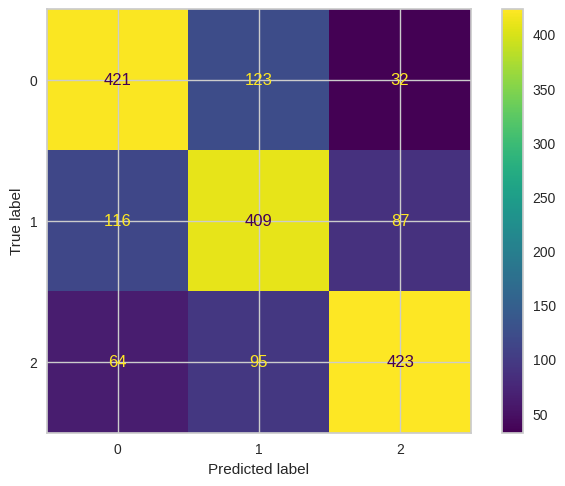

(0.9943470887507067,
 0.707909604519774,
 0.7101246011189691,
 0.707909604519774,
 0.7085647349913776)

In [89]:
Train_Test_Scores(RandomForestClassifier(n_jobs=-1),X_train_tfidf,y_train,
                  X_test_tfidf,y_test,True)

In [90]:
# Define classifier and fit it 
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_jobs=-1)

In [91]:
# Get predictors from Random Forest using TF-IDF
y_pred = clf.predict(X_test_tfidf)

In [92]:
# Classification report
target_names = ['Negative', 'Positive','Nuetural']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

    Negative       0.72      0.73      0.73       576
    Positive       0.66      0.68      0.67       612
    Nuetural       0.79      0.74      0.76       582

    accuracy                           0.72      1770
   macro avg       0.72      0.72      0.72      1770
weighted avg       0.72      0.72      0.72      1770



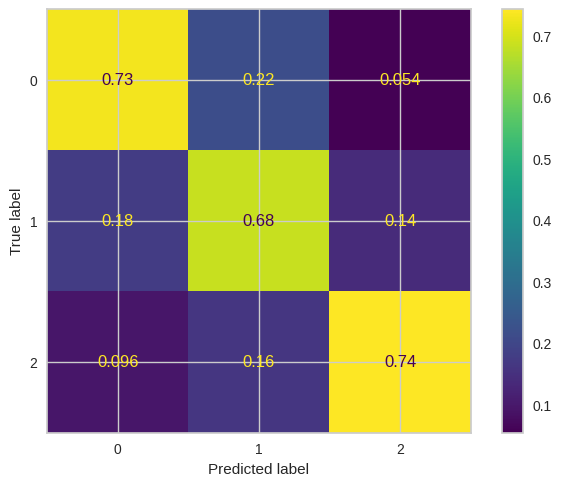

In [93]:
cm1 = confusion_matrix(y_test,y_pred,normalize='true')

#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=[0,1,2])
#disp.plot()
disp1.plot()
plt.show()

# https://scikit-learn.org/stable/modules/generated/sklearn.
# metrics.ConfusionMatrixDisplay.html

Random Forest shows accuracy of 73%, which means that it correctly classified 73% of the samples in the test set both negative and positive tweets correctly.

# LSTM

 LSTM (Long Short-Term Memory) is a type of neural network model that is structred to work with sequences of data, like text. 
* It has a unique architecture that includes both gates and memory cells, which allow it to learn and remember information over long periods of time.
* There are three types of gates in an LSTM: the input gate, the forget gate, and the output gate. These gates control the flow of information into and out of the memory cells.
    * The **input gate** determines how much new information is added to the memory cell at each time step.
    * The **forget gate** decides which information to discard from the memory cell, based on the current input   
    and the previous hidden state.
    * The **memory cell** stores and updates information over time, and is the key component that allows LSTM to 
    handle long-term dependencies.
    * Finally, the **output gate** determines how much information is passed from the memory cell to the output at 
    each time step.

In [94]:
# Importing Keras libraries
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten
from keras.layers import Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from keras_preprocessing.sequence import pad_sequences

# Downloading tensorflow library
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [95]:
%%time 
tokenizer = Tokenizer() # Initializing a new object 
tokenizer.fit_on_texts(X_train) # Tokenizer will learn the 
# vocabulary of the text data and assign a unique index to each word

# Vocabulary size (tokenizer reserves index 0)
vocab_size = len(tokenizer.word_index) + 1 
print("Total words", vocab_size)

Total words 6323
CPU times: user 70.9 ms, sys: 2 ms, total: 72.9 ms
Wall time: 72.3 ms


In [96]:
# KERAS
# Maximum length of the tweet. 
SEQUENCE_LENGTH = 300 

#Number of times it passes through the training data. 
EPOCHS = 3

# Size of matric for word2vec embeddings
W2V_SIZE = 200
# Number of training examples/samples to process at once during each iteration.
BATCH_SIZE = 16

# https://medium.com/@dclengacher/keras-lstm-recurrent-
#neural-networks-c1f5febde03d

In [97]:
# Converting training and testing data to sequences of word 
# indices to prepare for the model.
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), 
                        maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), 
                       maxlen=SEQUENCE_LENGTH)

In [98]:
# Check ditribution
y_train.value_counts()

0    1783
2    1778
1    1746
Name: sentiment, dtype: int64

In [99]:
x_train.shape

(5307, 300)

In [100]:
# Prepring word2vec for LSTM/Keras
embedding_matrix = np.zeros((vocab_size, W2V_SIZE)) # Initializing an empty
# embedding matrix with the shape
for word, i in tokenizer.word_index.items(): # Looping over each word in  tweet
  if word in w2v_model.wv: # Checksing if the word is in Word2Vec model
    embedding_matrix[i] = w2v_model.wv[word] # If yes, it assigns a vector
print(embedding_matrix.shape) # Printing shape

(6323, 200)


In [101]:
# Initializing embedding layers for our model 
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], 
                            input_length=SEQUENCE_LENGTH, trainable=False)

In [102]:
KERAS_MODEL = Sequential() # Creating a new sequential model
KERAS_MODEL.add(embedding_layer) # Adding embedding layer to the model.

# Dropout is a fraction of the neurons will drop in a layer during training. 
KERAS_MODEL.add(Dropout(0.5)) # Adding a dropout layer 
# Adding LSTM hidden layer with 100 neurons

KERAS_MODEL.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) 


# Adding a dense output layer to the model with a one one output and 
# a sigmoid activation function ( this layerreceives input from all 
# the neurons in the previous layer.)

KERAS_MODEL.add(Dense(1, activation='softmax')) 

KERAS_MODEL.summary() # Print summary 

# https://heartbeat.comet.ml/using-a-keras-long-shortterm-memory-
# lstm-model-to-predict-stock-prices-a08c9f69aa74

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 200)          1264600   
                                                                 
 dropout (Dropout)           (None, 300, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               120400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,385,101
Trainable params: 120,501
Non-trainable params: 1,264,600
_________________________________________________________________


In [103]:
# Compilying the model

KERAS_MODEL.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [104]:
# Initializing callback
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [105]:
# Fitting the model
history = KERAS_MODEL.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1, 
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/3
299/299 [==============================] - 274s 891ms/step - loss: 0.0000e+00 - accuracy: 0.3289 - val_loss: 0.0000e+00 - val_accuracy: 0.3296 - lr: 0.0010
Epoch 2/3
299/299 [==============================] - 263s 881ms/step - loss: 0.0000e+00 - accuracy: 0.3289 - val_loss: 0.0000e+00 - val_accuracy: 0.3296 - lr: 0.0010
Epoch 3/3
299/299 [==============================] - 262s 876ms/step - loss: 0.0000e+00 - accuracy: 0.3289 - val_loss: 0.0000e+00 - val_accuracy: 0.3296 - lr: 0.0010


In [106]:
# Storing test and training 
y_test_1d = list(y_test)
scores = KERAS_MODEL.predict(x_test, verbose=1, batch_size=16) 
# Rounding to match a label
y_pred_test_1d = [0 if score[0]<0.5 else (1 if score[0]==0.5 else 2) for score in scores ]

y_train_1d = list(y_train)
scores = KERAS_MODEL.predict(x_train, verbose=1, batch_size=16)
# Rounding to match a label
y_pred_train_1d = [0 if score[0]<0.5 else (1 if score[0]==0.5 else 2) for score in scores ] 

332/332 [==============================] - 27s 80ms/step


In [107]:
from sklearn.metrics import accuracy_score

In [108]:
# Storing scores 
train_acc = accuracy_score(y_train,y_pred_train_1d)
test_acc = accuracy_score(y_test,y_pred_test_1d)
precision = precision_score(y_test,y_pred_test_1d,average='weighted')
recall = recall_score(y_test,y_pred_test_1d,average='weighted')
f1 = f1_score(y_test,y_pred_test_1d,average='weighted')

In [109]:
# Show dataframe
models_DataFrame

Vectorizer         Model  Train_Accuracy  Test_Accuracy  Precision  \
0       TF-IDF    GaussianNB        0.816092       0.488701   0.522790   
1       TF-IDF  RandomForest        0.994347       0.710734   0.712875   
2       TF-IDF       XGboost        0.866026       0.718079   0.722925   
3  CountVector    GaussianNB        0.794988       0.490960   0.549069   
4  CountVector  RandomForest        0.994347       0.705650   0.706566   
5  CountVector       XGboost        0.832297       0.718644   0.723014   
6     Word2Vec    GaussianNB        0.501225       0.516949   0.539352   
7     Word2Vec  RandomForest        0.994536       0.615819   0.616656   
8     Word2Vec       XGboost        0.994536       0.619774   0.618659   

     Recall  F1_score  
0  0.488701  0.476424  
1  0.710734  0.711428  
2  0.718079  0.719500  
3  0.490960  0.474426  
4  0.705650  0.706047  
5  0.718644  0.720004  
6  0.516949  0.480632  
7  0.615819  0.615080  
8  0.619774  0.618505

In [110]:
# Adding word2vec and LTSM to dataframe
models_DataFrame.loc[len(models_DataFrame)] = ['Word2vec','LSTM',train_acc,
                                                       test_acc,precision,recall,f1]

In [111]:
# Show dataframe
models_DataFrame

Vectorizer         Model  Train_Accuracy  Test_Accuracy  Precision  \
0       TF-IDF    GaussianNB        0.816092       0.488701   0.522790   
1       TF-IDF  RandomForest        0.994347       0.710734   0.712875   
2       TF-IDF       XGboost        0.866026       0.718079   0.722925   
3  CountVector    GaussianNB        0.794988       0.490960   0.549069   
4  CountVector  RandomForest        0.994347       0.705650   0.706566   
5  CountVector       XGboost        0.832297       0.718644   0.723014   
6     Word2Vec    GaussianNB        0.501225       0.516949   0.539352   
7     Word2Vec  RandomForest        0.994536       0.615819   0.616656   
8     Word2Vec       XGboost        0.994536       0.619774   0.618659   
9     Word2vec          LSTM        0.335029       0.328814   0.108118   

     Recall  F1_score  
0  0.488701  0.476424  
1  0.710734  0.711428  
2  0.718079  0.719500  
3  0.490960  0.474426  
4  0.705650  0.706047  
5  0.718644  0.720004  
6  0.516949  0.480632  
7  0.615819  0.615080  
8  0.619774  0.618505  
9  0.328814  0.162729

In [112]:
# Sorting by accracy
models_DataFrame.sort_values('Test_Accuracy',ascending=False,inplace=True)

In [113]:
models_DataFrame

Vectorizer         Model  Train_Accuracy  Test_Accuracy  Precision  \
5  CountVector       XGboost        0.832297       0.718644   0.723014   
2       TF-IDF       XGboost        0.866026       0.718079   0.722925   
1       TF-IDF  RandomForest        0.994347       0.710734   0.712875   
4  CountVector  RandomForest        0.994347       0.705650   0.706566   
8     Word2Vec       XGboost        0.994536       0.619774   0.618659   
7     Word2Vec  RandomForest        0.994536       0.615819   0.616656   
6     Word2Vec    GaussianNB        0.501225       0.516949   0.539352   
3  CountVector    GaussianNB        0.794988       0.490960   0.549069   
0       TF-IDF    GaussianNB        0.816092       0.488701   0.522790   
9     Word2vec          LSTM        0.335029       0.328814   0.108118   

     Recall  F1_score  
5  0.718644  0.720004  
2  0.718079  0.719500  
1  0.710734  0.711428  
4  0.705650  0.706047  
8  0.619774  0.618505  
7  0.615819  0.615080  
6  0.516949  0.480632  
3  0.490960  0.474426  
0  0.488701  0.476424  
9  0.328814  0.162729

LSTM model using Word2Vec achieved low accuracy scores. The dataset might not have contained enough data to train the models well. Deep learning models like Word2Vec and LSTM typically require large amounts of data to learn complex patterns.

# Huggingface Models

Hugging Face specializes in natural language processing (NLP) and provides a library called "Transformers" for building and using regirous NLP models. The Hugging Face Transformers library provides access to pre-trained models which can be fine-tuned. I will use the Pretrained BERT model  - will use the weights of the pre-trained model and then adjust them for my airlines data.



https://huggingface.co/docs/transformers/training

BERT (Bidirectional Encoder Representations from Transformers) is a type of NLP model that is designed to understand the context and meaning of words in text. It is a pre-trained model that uses a technique called transformer architecture to process input text and create contextualized word embeddings, which represent the meaning of words based on their surrounding words in a sentence.


https://jalammar.github.io/illustrated-bert/

High-level steps for Hugging Face to fine-tune a pre-trained RoBERTa model:

    1. Prepare the dataset: converting the data into a dictionary format.
    2. Define a function to compute performance - this will be passed as an argument when using Trainer.
    3. Define labeling for the classes.
    4.Define a function to get the BERT pre-trained model by loading the tokenizer from the pre-trained model 
    checkpoint, tokenizing the dataset, and preparing the training arguments and trainer for fine-tuning.
    5.Train the model for fine-tuning and save the model.
    6.Define a function for inference/  (tokenizer,fine-tuned model, and the 
    text.)  
    7. Implementing/appling the fine-tuned model to new data and obtain predictions.

In [114]:
#  Accessing and processing various natural language processing (NLP) dataset
!pip install -q datasets
# Library for working with various transformer-based models, such as BERT,
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.3 MB/s eta 0:00:00


In [115]:
# Viewing training data
X_train

2230            appear six flight calgari tomorrow correct
3293     well taken care thank alreadi sent survey requ...
9212     travel agenc said usairway accept refund money...
12655                 late flightst usair4603 earlier 4591
14388    kid think done call dozen time amp tell call b...
                               ...                        
318      u help freyabevan fund need urgent treatment 2...
14292                                            thank see
14022                     dai presid good luck dfw even aa
9312                   airway joke never dealt wors servic
8936     ok great thank great flight fyi excit fli frus...
Name: clean_tweet, Length: 5307, dtype: object

In [116]:
# Checking the shape
X_train.shape

(5307,)

Splitting a ta_df into three parts: 1.training data, 2.validation data, and 3.test data. This allows for the model to be trained on one subset of the data, validated on another subset, and then tested on a completely separate subset to assess its performance. 

In [117]:
# Spliitting dataset
df_train = pd.DataFrame({'text':X_train,'label':y_train})
df_val = df_train.sample(550) #sampling random 550 for validaiton set
df_train = df_train.drop(df_val.index) # Dropping it so there is no overlap
df_test = pd.DataFrame({'text':X_test,'label':y_test})

Now we beed to import libraries and create a data set dictionary for the training and validation sets. 

In [118]:
import datasets # Access to NLP 
import os # Interact with numpy
import numpy as np

# Prepare dataset for finetuning by conveting the data into dict. format 
train_dataset = datasets.Dataset.from_dict(df_train)
val_dataset = datasets.Dataset.from_dict(df_val) #Validation
my_dataset_dict = datasets.DatasetDict({"train":train_dataset,
                                        "val":val_dataset})

In [119]:
# Check keys to prepare for dict. form.
print(my_dataset_dict.keys())

dict_keys(['train', 'val'])


In [120]:
# Viewing dataset in doct. format
my_dataset_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 4757
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 550
    })
})

We use  the transformers library to load a pre-trained tokenizer for the BERT model and tokenize the input data from the dict. format.

Importing from the transformers library to load the BERT model for sequence classification from the bert-base-uncased checkpoint.

In [121]:
!pip install -q evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 247.5 kB/s eta 0:00:00


In [122]:
# Importl library functions for evaluating the performance
import evaluate 

# obtain accuracy 
metric = evaluate.load("accuracy")

In [123]:
# function to compute performance while finetuning
def compute_metrics(eval_pred):
# logits: predicted probabilities for each class, while labels: true labels.
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
# Evaluating
    return metric.compute(predictions=predictions, references=labels) 
# https://huggingface.co/docs/evaluate/transformers_integrations

Specifying the directory where the model checkpoints and training logs will be saved and how often to evaluate the model performance during training (5 times).

# Function for finetuning



*   This function builds a process for fine-tuning a BERT-based language model on an airline sentiment dataset.
*   It takes a checkpoint as input and loads a tokenizer from it.

*   The function tokenizes the dataset using the tokenizer, pads the data, and gets the weights from the checkpoint for a pre-trained BERT model.
* It then prepares necessary training arguments for the fine-tuning process.
* The model is trained for 3 epochs using a Trainer.
* After training, the function saves the fine-tuned model so it can be retrieved.

In [124]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
from transformers import TrainingArguments, Trainer

# Defining labling 
class_names = ['negative','neutral','positive']

def get_finetuned_model(checkpoint):
    
    # Loading Tokenizer from twitter-roberta-base-sentiment checkpoint

    # checkpoint = chkpoint #"cardiffnlp/twitter-roberta-base-sentiment" 
    tokenizer = AutoTokenizer.from_pretrained(checkpoint)

    # Getting tokenized dataset
    def tokenize_function(examples):

       # Padding and returning tokenizer
    #https://huggingface.co/transformers/v3.0.2/preprocessing.html
        return tokenizer(examples["text"], padding="max_length", max_length=20,
                         truncation=True)
      #  Creating a new tokenized dataset  - to fine tune BRET model  
    tokenized_datasets = my_dataset_dict.map(tokenize_function, batched=True)

    # Loading classifier from twitter-roberta-base-sentiment - to get weights
    # is a generic model class that will be instantiated as one of the sequence
    # classification model classes.
    # https://huggingface.co/transformers/v3.0.2/model_doc/auto.html#
    # automodelforsequenceclassification
    model = AutoModelForSequenceClassification.from_pretrained(checkpoint, 
            num_labels=len(class_names))

    # Preparing training Arguments
    # https://programtalk.com/python-more-examples/
    # transformers.TrainingArguments/
    training_args = TrainingArguments(output_dir="test_trainer", 
                                      evaluation_strategy="epoch",
                                      num_train_epochs = 3, 
                                      overwrite_output_dir=True)
    
    # Trainer for finetuning

    trainer = Trainer(
        model=model, # Pre trained BRET model
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["val"],
        compute_metrics=compute_metrics,
    )

    # train the model for finetuning
    trainer.train()

    # save the model, its architecture and learned parameters
    trainer.save_model("finetuned_model")

    # Loading fientuned model
    model_tuned = AutoModelForSequenceClassification.from_pretrained("finetuned_model")
    return model_tuned,tokenizer

In [125]:
# model_tuned1,tokenizer1 = get_finetuned_model('bert-base-uncased')

In [126]:
model_tuned2,tokenizer2 = get_finetuned_model('cardiffnlp/twitter-roberta-base-sentiment')

Map:   0%|          | 0/4757 [00:00<?, ? examples/s]

Map:   0%|          | 0/550 [00:00<?, ? examples/s]

The function below takes a tokenizer, a trained BERT  model.
* It creates a dictionary of features that can be used as input to the BERT model, including tokenization and padding.
* The function computes the outcome of the model using the spesific features.
* The output from the model is converted to an array of scores.
* The scores are transformed into probabilities for each class using the softmax function.
* The function assigns labels to each class.
* Finally, the function returns the index of the class with the highest probability.

In [127]:
# https://huggingface.co/cardiffnlp/
# twitter-roberta-base-sentiment-latest
# Maximum sequence length 
max_seq_length = 100 

# import library for multi class
from scipy.special import softmax

def inference(tokenizer,model_tuned,text):

  # Creating a dictionary of features that can be used as input to the BERT model.
    features = tokenizer.batch_encode_plus(
        [text],
        add_special_tokens=True,
        padding='max_length',
        max_length=max_seq_length,
        truncation=True,
        return_tensors='pt',
        return_attention_mask=True
    )
    # Compuing to get the outcome
    outputs = model_tuned(features['input_ids'], features['attention_mask'])
    
    # Converting the output into an array
    scores = outputs[0][0].detach().numpy()
    # Getting propabilities for each class.
    scores = softmax(scores)
    # Storiing Postive, Neutral and Negative
    labels = class_names
    # Returning the highest prop.
    return scores.argmax()

In [128]:
# Inference function Example 

textual_input = "your airline is awesome but your lax loft needs to step up its game."
predicted_class = inference(tokenizer2, model_tuned2, textual_input)
print("Predicted class:", predicted_class)


Predicted class: 0


In [129]:
# Passing inference through each tweet
y_pred = df_test['text'].progress_apply(lambda x: inference(tokenizer2,
                                                            model_tuned2, x))

  0%|          | 0/1770 [00:00<?, ?it/s]

In [130]:
# Gertting accuracy score
accuracy_score(y_test,y_pred) 

0.7519774011299435

This function takes the predicted labels of a checkpoint as input.

* It calculates the scores of the predicted labels.
* It updates the dataframe and sorts the it by test accuracy and returns the dataframe.

In [131]:
def add_entry_dataframe(y_pred,chk_name):
  # Getting all the other scores 
  test_acc = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred,average='weighted')
  recall = recall_score(y_test,y_pred,average='weighted')
  f1 = f1_score(y_test,y_pred,average='weighted')

  # updating a DataFrame with the results of fine-tuning a BERT mode
  models_DataFrame.loc[len(models_DataFrame)] = ['',f'{chk_name}-Finetuned',
                                                '',
                                                    test_acc,precision,recall,f1]

  # Sorting the dataframe by test accuracy
  models_DataFrame.sort_values('Test_Accuracy',ascending=False,inplace=True)

  return models_DataFrame

In [132]:
 # Classification report for BERT
target_names = ['Negative', 'Positive','Nuetural']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

    Negative       0.75      0.78      0.77       576
    Positive       0.72      0.67      0.69       612
    Nuetural       0.78      0.82      0.80       582

    accuracy                           0.75      1770
   macro avg       0.75      0.75      0.75      1770
weighted avg       0.75      0.75      0.75      1770



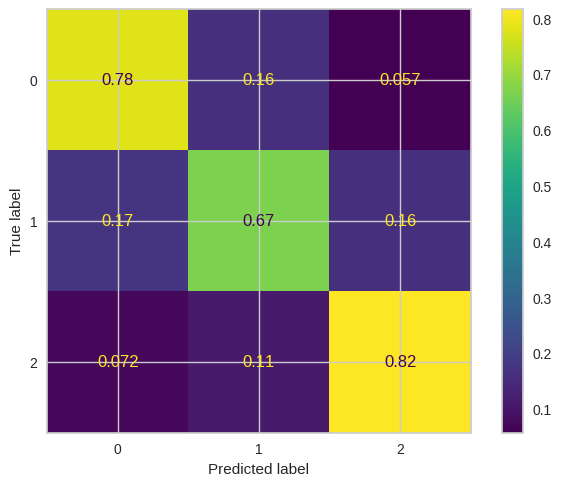

In [133]:
cm1 = confusion_matrix(y_test,y_pred,normalize='true')

#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=[0,1,2])
#disp.plot()
disp.plot()
plt.show()

# https://scikit-learn.org/stable/modules/generated/sklearn.
# metrics.ConfusionMatrixDisplay.html

In [134]:
# Interpreting resutls of the model

Accuracy: This measures the overall proportion of instances that the model correctly classified, regardless of class. In this case, the model achieved an accuracy of 0.75, which means that it correctly classified 75% of the instances in the dataset.

In [135]:
add_entry_dataframe(y_pred,'bert-base-uncased') # change checkpoint name here

Vectorizer                        Model Train_Accuracy  Test_Accuracy  \
10               bert-base-uncased-Finetuned                      0.751977   
5   CountVector                      XGboost       0.832297       0.718644   
2        TF-IDF                      XGboost       0.866026       0.718079   
1        TF-IDF                 RandomForest       0.994347       0.710734   
4   CountVector                 RandomForest       0.994347       0.705650   
8      Word2Vec                      XGboost       0.994536       0.619774   
7      Word2Vec                 RandomForest       0.994536       0.615819   
6      Word2Vec                   GaussianNB       0.501225       0.516949   
3   CountVector                   GaussianNB       0.794988       0.490960   
0        TF-IDF                   GaussianNB       0.816092       0.488701   
9      Word2vec                         LSTM       0.335029       0.328814   

    Precision    Recall  F1_score  
10   0.750689  0.751977  0.750772  
5    0.723014  0.718644  0.720004  
2    0.722925  0.718079  0.719500  
1    0.712875  0.710734  0.711428  
4    0.706566  0.705650  0.706047  
8    0.618659  0.619774  0.618505  
7    0.616656  0.615819  0.615080  
6    0.539352  0.516949  0.480632  
3    0.549069  0.490960  0.474426  
0    0.522790  0.488701  0.476424  
9    0.108118  0.328814  0.162729

# Prepare data for topic modelling

For topic modeling, I will be using the PyLDAvis library.
However, I have encountered issues between PyLDAvis and Google Colab.
The visualizations can be seen in a separate Jupyter notebook.

In [136]:
# Topic Modeling 
from google.colab import files

In [137]:
# negative tweets index
neg_index = df_test[df_test['label']==0].index
data = ta_df.loc[neg_index]

data.to_csv('data_for_topic_m.csv',index=False)
files.download('data_for_topic_m.csv')

# use this csv and use the topic modelling notebook

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  SHAP 

https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Emotion%20classification%20multiclass%20example.html

SHAP (SHapley Additive exPlanations) helps interpret the predictions of a machine learning model. It does this by determining the importance of each input feature to the output prediction.  

In this section, we will use shap to see how the model works for positive and negative tweets.


In [138]:
# Intall shap library
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 22.8 MB/s eta 0:00:00


In [139]:
# Importing snap and 'ignore' for removal of warning msg.

import shap
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [140]:
import transformers

# Loading the model and tokenizer
tokenizer = tokenizer2
model = model_tuned2 

# Building a pipeline object to do predictions
pred = transformers.pipeline("text-classification", 
                             model=model, tokenizer=tokenizer, device=0, 
                             return_all_scores=True)

In [141]:
# Explainer object generates explanations for individual predictions 
explainer = shap.Explainer(pred)

In [142]:
data.head()

sentiment                                               text  \
2136           0  @United Can you increase the legroom? : How ai...   
7416           0  @JetBlue Third straight time that my flight ha...   
11985          0  @AmericanAir I'm not sure what happened to my ...   
2350           0  @united is probably the least satisfactory air...   
14620          0  @AmericanAir I wait 2+ hrs for CS to call me b...   

                                             clean_tweet  \
2136          increas legroom airlin compar via cnnmoney   
7416   third straight time flight delay fli guy last ...   
11985       sure happen usairway statu merger took place   
2350   probabl least satisfactori airlin ever never f...   
14620  wait 2 hr cs call back flt cxld protect amp ha...   

                                     clean_tweet_wt_stem  \
2136      increase legroom airlines compare via cnnmoney   
7416   third straight time flight delayed flying guys...   
11985   sure happened usairways status merger took place   
2350   probably least satisfactory airline ever never...   
14620  wait 2 hrs cs call back flt cxld protection am...   

                                                  tokens  
2136   [increas, legroom, airlin, compar, via, cnnmoney]  
7416   [third, straight, time, flight, delay, fli, gu...  
11985  [sure, happen, usairway, statu, merger, took, ...  
2350   [probabl, least, satisfactori, airlin, ever, n...  
14620  [wait, 2, hr, cs, call, back, flt, cxld, prote...

In [143]:
data['y_pred']= y_pred
data.head()

sentiment                                               text  \
2136           0  @United Can you increase the legroom? : How ai...   
7416           0  @JetBlue Third straight time that my flight ha...   
11985          0  @AmericanAir I'm not sure what happened to my ...   
2350           0  @united is probably the least satisfactory air...   
14620          0  @AmericanAir I wait 2+ hrs for CS to call me b...   

                                             clean_tweet  \
2136          increas legroom airlin compar via cnnmoney   
7416   third straight time flight delay fli guy last ...   
11985       sure happen usairway statu merger took place   
2350   probabl least satisfactori airlin ever never f...   
14620  wait 2 hr cs call back flt cxld protect amp ha...   

                                     clean_tweet_wt_stem  \
2136      increase legroom airlines compare via cnnmoney   
7416   third straight time flight delayed flying guys...   
11985   sure happened usairways status merger took place   
2350   probably least satisfactory airline ever never...   
14620  wait 2 hrs cs call back flt cxld protection am...   

                                                  tokens  y_pred  
2136   [increas, legroom, airlin, compar, via, cnnmoney]       1  
7416   [third, straight, time, flight, delay, fli, gu...       0  
11985  [sure, happen, usairway, statu, merger, took, ...       1  
2350   [probabl, least, satisfactori, airlin, ever, n...       0  
14620  [wait, 2, hr, cs, call, back, flt, cxld, prote...       0

In [144]:
# Extracting negative tweets
df_neg = data[data['y_pred']==0]['clean_tweet_wt_stem']
df_neg.head()

7416     third straight time flight delayed flying guys...
2350     probably least satisfactory airline ever never...
14620    wait 2 hrs cs call back flt cxld protection am...
9965     yesterday delayed six hours w lil explanation ...
6911     ok cancelled flight flight 1274 tmrw weather a...
Name: clean_tweet_wt_stem, dtype: object

In [145]:
# Viewing first 5 tweets
df_neg[:3]

7416     third straight time flight delayed flying guys...
2350     probably least satisfactory airline ever never...
14620    wait 2 hrs cs call back flt cxld protection am...
Name: clean_tweet_wt_stem, dtype: object

In [146]:
# Extracting negative tweets
df_pos = data[data['y_pred']==2]['clean_tweet_wt_stem']
df_pos.head()

1404     belabor point able put laptop bag seat announc...
4317                                   still waiting reply
10149    family friends colleagues never fly usair bad ...
9970     suggest failures make huge donation uso charlo...
8723     shout crew flight 89 headed back big apple kep...
Name: clean_tweet_wt_stem, dtype: object

In [147]:
df_pos[:6]

1404     belabor point able put laptop bag seat announc...
4317                                   still waiting reply
10149    family friends colleagues never fly usair bad ...
9970     suggest failures make huge donation uso charlo...
8723     shout crew flight 89 headed back big apple kep...
9186     yay glitchy tracking system bags made destinat...
Name: clean_tweet_wt_stem, dtype: object

### Plotting Negative Tweets

In [148]:
# Get the shap_values for the 3 rows 
shap_values_neg = explainer(df_neg[:3])

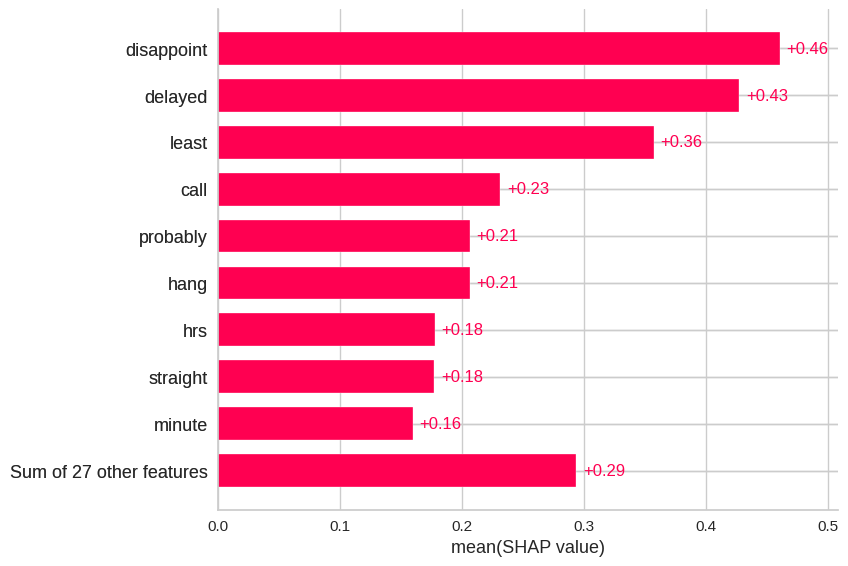

In [149]:
shap.plots.bar(shap_values_neg[:, :, 0].mean(0))


### Plotting Positive Tweets

In [150]:
# Extracting negative tweets
df_pos = data[data['y_pred']==2]['clean_tweet_wt_stem']
df_pos.head()

1404     belabor point able put laptop bag seat announc...
4317                                   still waiting reply
10149    family friends colleagues never fly usair bad ...
9970     suggest failures make huge donation uso charlo...
8723     shout crew flight 89 headed back big apple kep...
Name: clean_tweet_wt_stem, dtype: object

In [151]:
# Obtaining 15 first positive tweets. 
shap_values_pos = explainer(df_pos[:15])

  0%|          | 0/462 [00:00<?, ?it/s]

Partition explainer:  87%|████████▋ | 13/15 [00:26<00:03,  1.65s/it]

  0%|          | 0/420 [00:00<?, ?it/s]

Partition explainer: 16it [00:34,  3.13s/it]


In [152]:
# Plotting the shap values
shap.plots.text(shap_values_pos)

In [153]:
print(shap_values_pos.shape)

(15, None, 3)


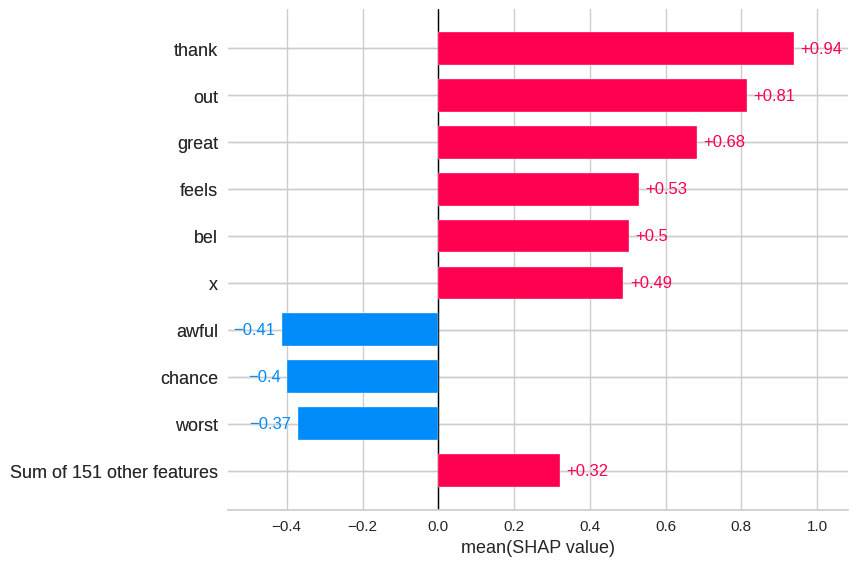

In [154]:
# Create a bar plot of the SHAP values in the positive tweets.
shap.plots.bar(shap_values_pos[:, :, 2].mean(0))


#### Conclusion: 
    
Given that customer service is a critical issue, here are few suggestions    US airlines should implement comprehensive customer service training and rewards for exceptional service. 

***
US airlines can improve flight delays by increasing efficiency in turnaround times and improving scheduling. We suggest that government agencies work with airlines to promote and incentivize these improvements.

***
US airlines should strive to do more of what customers appreciate, such as providing a positive and caring flight experience with attentive service and going above and beyond to help during flights. This can involve faster response times for customer issues and proactive inquiries about customer needs during flights.
